# **Predicting Rent Price of Houses**
The aim of this project is to build a machine learning model to predict the rent price of homes based on different explanatory variables describing aspects of residential houses.

### **House Rent dataset: Data Analysis**

In [1]:
# Importing necessary libraries for handling datasets
import pandas as pd   # Pandas for data manipulation
import numpy as np    # NumPy for numerical operations

# for plotting
import matplotlib.pyplot as plt   # Matplotlib for basic plotting
import seaborn as sns             # Seaborn for enhanced visualization
import plotly.express as px       # Plotly Express for interactive plotting
%matplotlib inline

# Displaying all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

**Data Import**

In [2]:
data = pd.read_csv('AML_mainDS.csv')    # Reading the CSV file into a DataFrame
data.shape                              # Checking the shape of the DataFrame

(29999, 22)

The house price dataset contains 29,999 rows, i.e., houses, and 22 columns, i.e., variables.

**Data Description**

In [3]:
# Show data header
data.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7046799953,https://fortwayne.craigslist.org/apa/d/auburn-...,fort wayne,https://fortwayne.craigslist.org,734,apartment,960,2,1.0,1,1,1,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00g0g_87LfVy6B3s...,Apply online @ www.griswoldestatesapts.com M...,41.3590,-85.0468,in
1,7038578060,https://fortwayne.craigslist.org/apa/d/fort-wa...,fort wayne,https://fortwayne.craigslist.org,711,apartment,980,2,2.0,0,0,1,0,0,0,NaN,NaN,https://images.craigslist.org/00I0I_7RzcCeYCX0...,Canterbury Greenhttps://www.gocanterburygreen....,41.1233,-85.1051,in
2,7043695868,https://fortwayne.craigslist.org/apa/d/fort-wa...,fort wayne,https://fortwayne.craigslist.org,600,apartment,1782,4,2.0,0,0,1,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00404_3ejqNiPJQc...,Spectacularly refurbished 2-story in the '07 -...,41.0429,-85.1368,in
3,7046753287,https://fortwayne.craigslist.org/apa/d/fort-wa...,fort wayne,https://fortwayne.craigslist.org,1199,manufactured,1568,4,2.0,1,1,1,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00u0u_cC9vbPkSL9...,4 Bedroom/2 Bath 7010 Kensington Drive East F...,41.1468,-85.2067,in
4,7046718587,https://fortwayne.craigslist.org/apa/d/fort-wa...,fort wayne,https://fortwayne.craigslist.org,733,apartment,682,1,1.0,1,1,1,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/01616_2HagGUtvgO...,1 Bedroom 1 Bathroom | 682 sq ft | $733 - $89...,41.0508,-85.2560,in


In [4]:
data.tail()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
29994,7037731886,https://neworleans.craigslist.org/apa/d/new-or...,new orleans,https://neworleans.craigslist.org,1700,house,1459,3,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00S0S_hih4p6Ifnq...,Located in the Algiers area on the Westbank at...,29.9300,-90.0029,la
29995,7049300430,https://neworleans.craigslist.org/apa/d/lakevi...,new orleans,https://neworleans.craigslist.org,1150,apartment,1000,2,1.0,0,0,0,0,0,0,w/d hookups,NaN,https://images.craigslist.org/00x0x_6TFPRFah2e...,Lakeview Adorable Raised Cottage (1/2 block of...,30.0107,-90.0998,la
29996,7049294607,https://neworleans.craigslist.org/apa/d/gretna...,new orleans,https://neworleans.craigslist.org,785,apartment,744,2,1.0,0,0,0,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00p0p_lf1zLZmsPf...,Renovated unit includes ceramic/laminate floor...,29.9146,-90.0569,la
29997,7049292253,https://neworleans.craigslist.org/apa/d/new-or...,new orleans,https://neworleans.craigslist.org,1995,apartment,1366,2,2.0,0,0,1,0,0,0,NaN,NaN,https://images.craigslist.org/00u0u_kZqD5FuZkL...,"Located in River Ridge, just outside of New Or...",29.9645,-90.2052,la
29998,7049272170,https://neworleans.craigslist.org/apa/d/metair...,new orleans,https://neworleans.craigslist.org,1055,apartment,796,1,1.0,1,1,1,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00V0V_aa6BEnm0lE...,There's nothing like getting off of work & wal...,29.9958,-90.1780,la


**Data Information**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29999 non-null  int64  
 1   url                      29999 non-null  object 
 2   region                   29999 non-null  object 
 3   region_url               29999 non-null  object 
 4   price                    29999 non-null  int64  
 5   type                     29999 non-null  object 
 6   sqfeet                   29999 non-null  int64  
 7   beds                     29999 non-null  int64  
 8   baths                    29999 non-null  float64
 9   cats_allowed             29999 non-null  int64  
 10  dogs_allowed             29999 non-null  int64  
 11  smoking_allowed          29999 non-null  int64  
 12  wheelchair_access        29999 non-null  int64  
 13  electric_vehicle_charge  29999 non-null  int64  
 14  comes_furnished       

There are 13 numerical features and 9 categorical features.

**Data Columns**

In [6]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

**Statistical analysis of dataset**

Showing min, max, std, and count of each numerical variables in the dataset

In [7]:
data.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29912.000000,29912.000000
mean,7.041659e+09,961.454815,959.733991,1.891030,1.426664,0.743425,0.730558,0.745325,0.067469,0.005800,0.037768,38.107997,-91.492211
std,8.057889e+06,7668.488584,540.141674,0.888376,0.571673,0.436750,0.443677,0.435686,0.250837,0.075939,0.190638,3.878429,4.570825
min,7.005562e+09,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.266600,-157.827000
25%,7.037186e+09,679.000000,730.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.693800,-95.715100
50%,7.043638e+09,800.000000,910.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,39.011900,-92.065600
75%,7.048288e+09,970.000000,1104.500000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.226300,-86.240700
max,7.051234e+09,859864.000000,46514.000000,8.000000,7.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,-13.676200


**Missing values**

Show if there are missing datapoints

In [8]:
data.isna().mean().sort_values(ascending=False)

parking_options            0.340178
laundry_options            0.195673
long                       0.002900
lat                        0.002900
id                         0.000000
url                        0.000000
description                0.000000
image_url                  0.000000
comes_furnished            0.000000
electric_vehicle_charge    0.000000
wheelchair_access          0.000000
smoking_allowed            0.000000
dogs_allowed               0.000000
cats_allowed               0.000000
baths                      0.000000
beds                       0.000000
sqfeet                     0.000000
type                       0.000000
price                      0.000000
region_url                 0.000000
region                     0.000000
state                      0.000000
dtype: float64

Variables containing missing values:-

parking_options (34%)
laundry_options (19%)
lat & long (nominal percentage)

### **Heat Map**

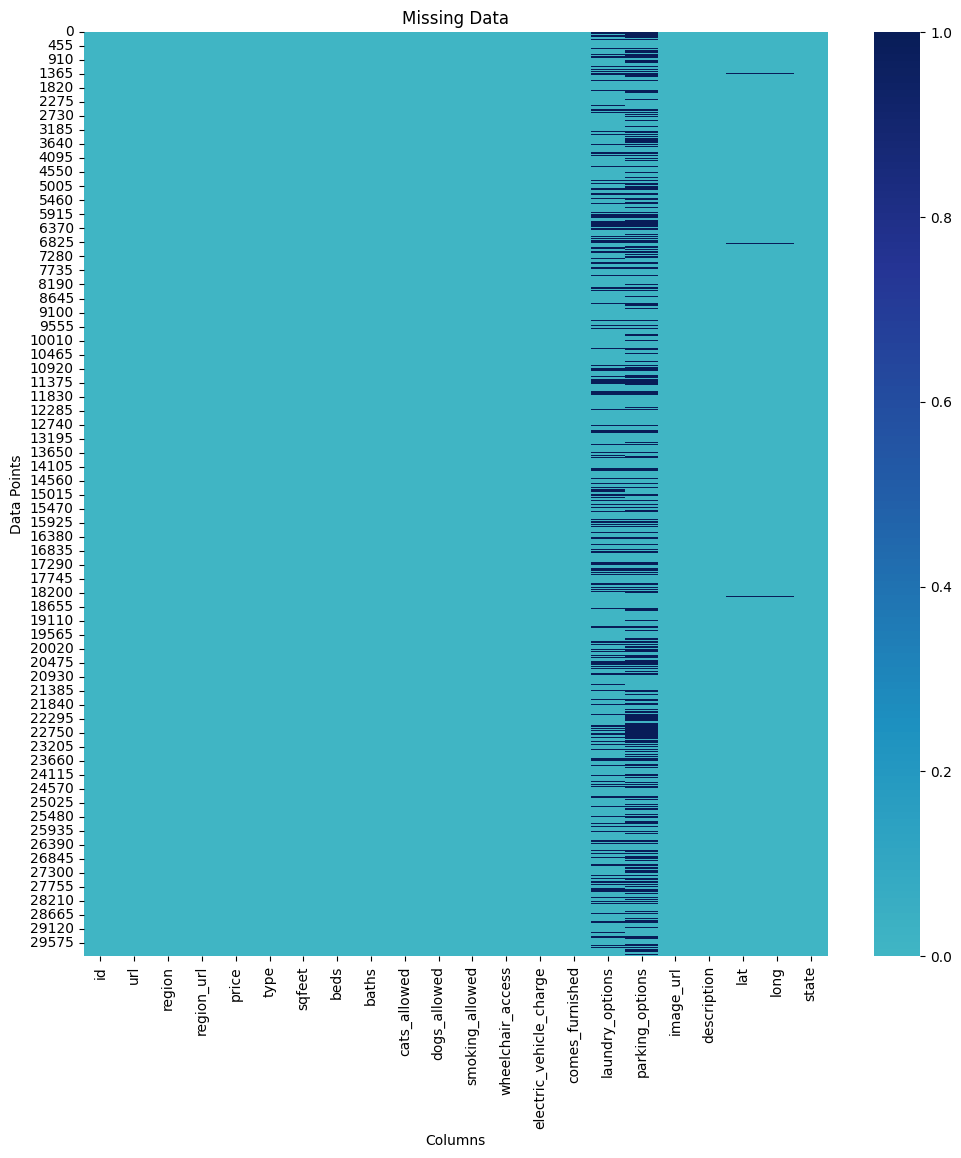

In [9]:
fig, ax = plt.subplots(figsize=(12,12))     # Creating a figure and axis object
sns.heatmap(data.isnull(), ax=ax, cmap="YlGnBu", center=0).set(   # Creating the heatmap
            title = 'Missing Data',         # Setting the title of the plot
            xlabel = 'Columns',             # Setting the label for the x-axis
            ylabel = 'Data Points');        # Setting the label for the y-axis

In [10]:
# List of variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
# Calculate the proportion of missing values for each variable
data[vars_with_na].isnull().mean()

laundry_options    0.195673
parking_options    0.340178
lat                0.002900
long               0.002900
dtype: float64

Our dataset contains a few variables with missing values.

Relationship between values being missing and price

Let's evaluate the price of the house in those observations where the information is missing, for each variable.

## **Bar Plot**

<ipython-input-11-cbffc5c547af>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grs[var].astype(str), y=grs['price'], palette={"0": "blue", "1": "orange"})


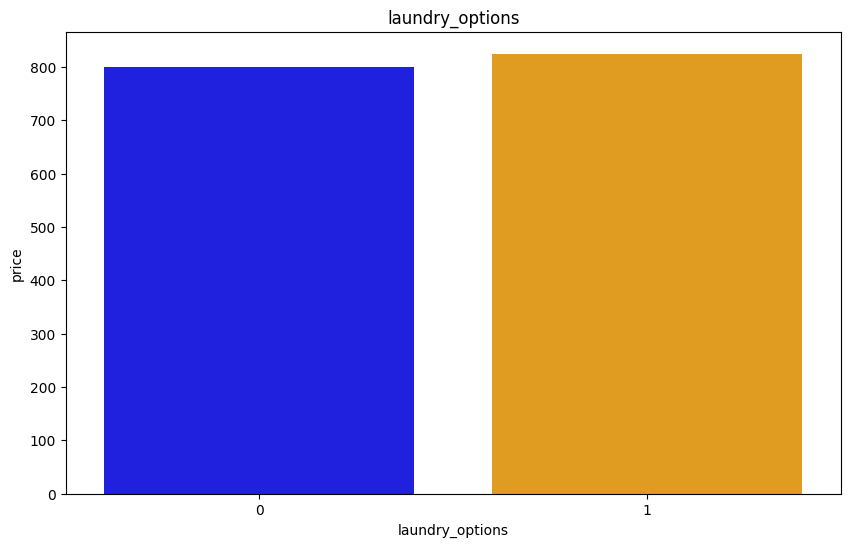

<ipython-input-11-cbffc5c547af>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grs[var].astype(str), y=grs['price'], palette={"0": "blue", "1": "orange"})


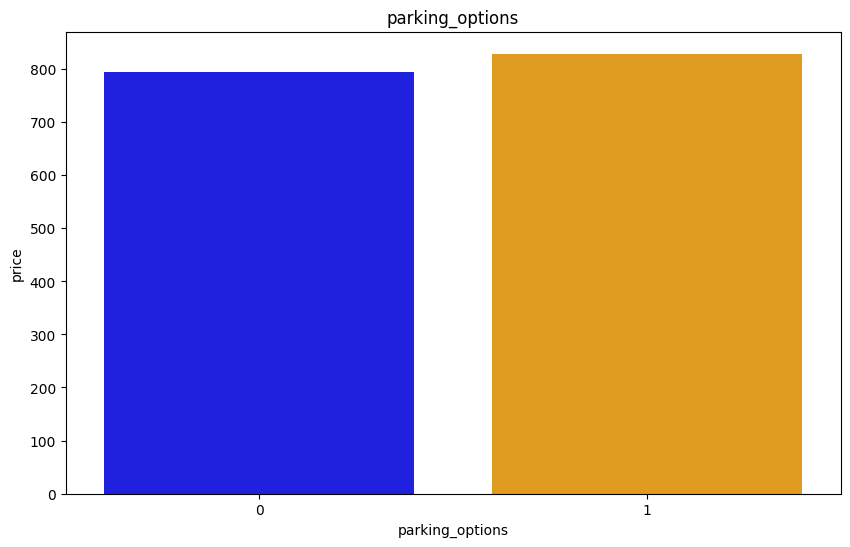

<ipython-input-11-cbffc5c547af>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grs[var].astype(str), y=grs['price'], palette={"0": "blue", "1": "orange"})


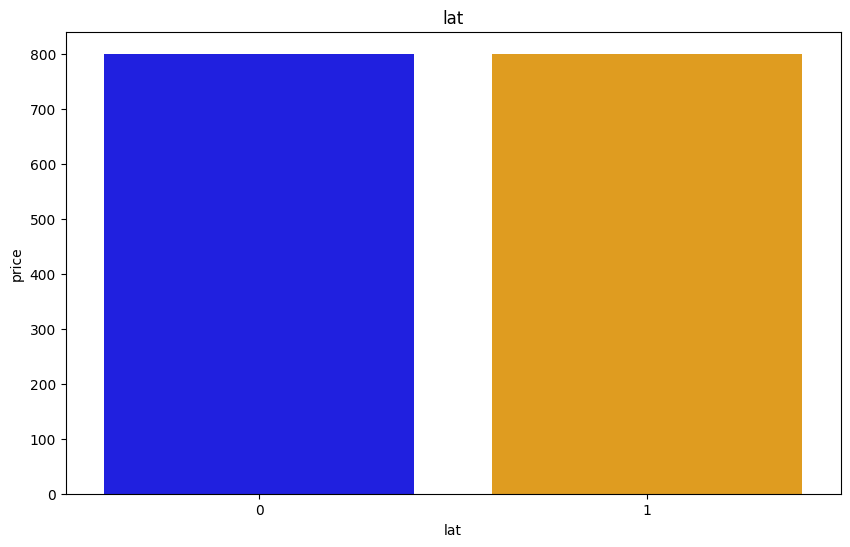

<ipython-input-11-cbffc5c547af>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grs[var].astype(str), y=grs['price'], palette={"0": "blue", "1": "orange"})


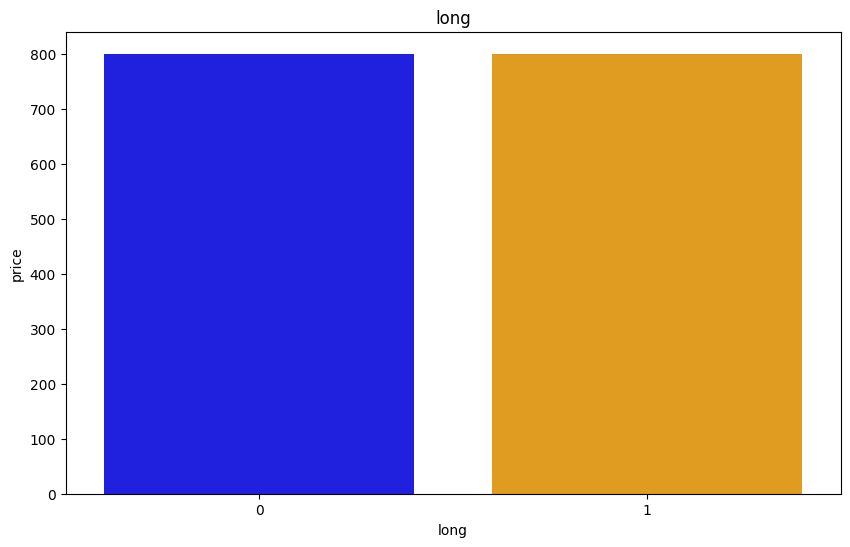

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def analyse_na_value(df, var):
    df = df.copy()
    # Let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isna(), 1, 0)
    grs = df.groupby(var)['price'].median().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=grs[var].astype(str), y=grs['price'], palette={"0": "blue", "1": "orange"})
    plt.title(var)
    plt.show()

# Let's run the function on each variable with missing data
for var in vars_with_na:
    analyse_na_value(data, var)

The average rent price in houses where the information is missing, differs from the average rent price in houses where information exists.


**Categorical variables**

In [12]:
# Identify categorical variables with missing values

vars_with_na = [
    var for var in data.columns       # Iterate over columns in the DataFrame
    if data[var].isnull().sum() > 0 and data[var].dtypes == 'O'     # Check if the column has missing values and if the column dtype is object (categorical)
]
print(vars_with_na)     # Print the list of categorical variables with missing values
# Calculate the proportion of missing values for each categorical variable
data[vars_with_na].isna().mean()

['laundry_options', 'parking_options']


laundry_options    0.195673
parking_options    0.340178
dtype: float64

In [13]:
data[vars_with_na].head()

,laundry_options,parking_options
0,laundry in bldg,off-street parking
1,NaN,NaN
2,w/d in unit,attached garage
3,w/d in unit,detached garage
4,w/d in unit,off-street parking


**Description**

In [14]:
data.description[0]

'Apply online @ www.griswoldestatesapts.com   Move in ready ! Short term leases available !  Apartment has open living /dining area with a huge pass through that doubles as a snack bar ! Great for large dinners or homework with the kids while preparing that dinner ! Full sized GE appliances and the dream for a dishwasher is answered ! Plush neutral carpet , Large windows that let in tons of light , Amazing closets and a Large bath with full tub/shower combo ! Stop by and take a tour of our model !  Free Heat ! Free Soft Water ! Free Sewage !  Maintenance Free Living ! 24 Hour Emergency Maintenance ! Coin operated Laundry on site !'

**State**

In [15]:
data[['region','state']].head(15)

,region,state
0,fort wayne,in
1,fort wayne,in
2,fort wayne,in
3,fort wayne,in
4,fort wayne,in
5,fort wayne,in
6,fort wayne,in
7,fort wayne,in
8,fort wayne,in
9,fort wayne,in


In [16]:
data.groupby('region')['state'].value_counts()

region                      state
ames                        ia        343
baton rouge                 la       1854
bowling green               ky       1018
cedar rapids                ia        754
central louisiana           la        101
des moines                  ia       2277
dubuque                     ia         83
eastern kentucky            ky         57
fort dodge                  ia        111
fort wayne                  in        552
houma                       la        221
huntington-ashland          ky        127
indianapolis                in       2116
iowa city                   ia        380
kansas city, MO             ks       1783
kokomo                      in         77
lafayette                   la       1546
lafayette / west lafayette  in        293
lake charles                la        369
lawrence                    ks        532
lexington                   ky       2266
louisville                  ky       1865
manhattan                   ks       1084


The state is highly related to the region. So filing the missing values of state with the mode value of state for that region.

**laundry_options**

In [17]:
data.groupby('type')['laundry_options'].value_counts()

type           laundry_options   
apartment      w/d in unit           6145
               laundry on site       4512
               laundry in bldg       4499
               w/d hookups           4345
               no laundry on site     154
condo          w/d in unit            221
               w/d hookups             37
               laundry on site         19
               laundry in bldg         18
               no laundry on site       3
cottage/cabin  w/d in unit             14
               w/d hookups             11
               no laundry on site       4
               laundry in bldg          3
               laundry on site          2
duplex         w/d hookups            208
               w/d in unit            136
               laundry in bldg         19
               laundry on site         14
               no laundry on site      10
flat           laundry in bldg         11
               w/d in unit              8
               w/d hookups              4


Filling in the missing laundry_options with the mode value of laundry_options for the type of the house.

**parking_options**

In [18]:
data.groupby('type')['parking_options'].value_counts()

type           parking_options   
apartment      off-street parking    12010
               carport                 959
               detached garage         950
               attached garage         874
               street parking          702
               no parking               29
               valet parking             3
condo          off-street parking      103
               attached garage          97
               detached garage          64
               street parking           13
               carport                  12
               no parking                5
               valet parking             1
cottage/cabin  off-street parking       25
               street parking            1
               attached garage           1
duplex         off-street parking      157
               attached garage         126
               street parking           51
               detached garage          35
               carport                  16
               no pa

Same as laundry_options, filling in the missing parking_options with the mode value of parking_options for the type of the house.

We will fill in the missing values in the notebook for Feature Engineering Pipeline

**Numerical variables**

In [19]:
# make a list with the numerical variables that contain missing values
vars_with_na = [
    var for var in data.columns
    if data[var].isnull().sum() > 0 and data[var].dtypes != 'O'
]
print(vars_with_na)
# print percentage of missing values per variable
data[vars_with_na].isnull().mean()

['lat', 'long']


lat     0.0029
long    0.0029
dtype: float64

**lat**

In [20]:
data.groupby('region')['lat'].value_counts()

region   lat    
ames     42.4536    44
         42.0449    27
         42.0202    24
         42.0220    21
         41.6884    14
                    ..
wichita  37.5710     1
         37.5765     1
         37.5769     1
         37.5915     1
         46.5321     1
Name: count, Length: 5056, dtype: int64

**long**

In [21]:
data.groupby('region')['long'].value_counts()

region   long    
ames     -93.8161    44
         -93.6398    26
         -93.6666    23
         -93.6763    20
         -93.6945    14
                     ..
wichita  -97.3453     1
         -97.3449     1
         -97.3433     1
         -97.3411     1
         -97.3399     1
Name: count, Length: 5190, dtype: int64

As we know lattitudes and longitudes tends to correspond to the region. So it will be appropriate to fill missing lattitudes and longitudes with the mode value for the region.

**Boolean Variables**

Extracting the boolean variables

In [22]:
bool_vars = [var for var in data if data[var].nunique() == 2]

data[bool_vars].head()

,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
0,1,1,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,1,1,1,0,0,0


In [23]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O' and var not in bool_vars]

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  7


,id,price,sqfeet,beds,baths,lat,long
0,7046799953,734,960,2,1.0,41.3590,-85.0468
1,7038578060,711,980,2,2.0,41.1233,-85.1051
2,7043695868,600,1782,4,2.0,41.0429,-85.1368
3,7046753287,1199,1568,4,2.0,41.1468,-85.2067
4,7046718587,733,682,1,1.0,41.0508,-85.2560


From the above view of the dataset, we notice the variable id, which is an indicator of the house. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each house in the dataset.

In [24]:
print('Number of House Id labels: ', len(data.id.unique()))
print('Number of Houses in the Dataset: ', len(data))

Number of House Id labels:  29999
Number of Houses in the Dataset:  29999


Same goes for url and image_url, each house have different set of values for these features

**Geographical variables**

Plotting lattitude and longitude to get more insights

### **Scatter Plot**

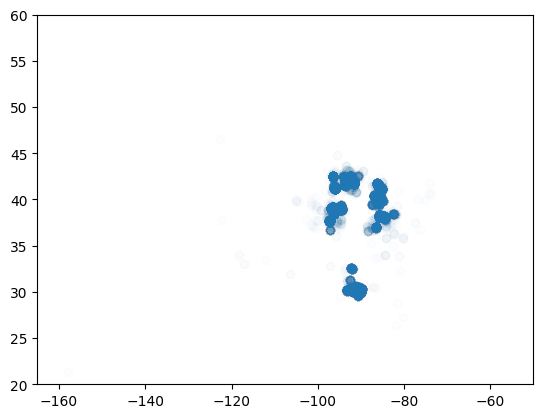

In [25]:
plt.scatter(x=data['long'], y=data['lat'],alpha=0.01)
plt.xlim(right=-50)
plt.ylim(bottom=20,top=60)
plt.show()

**Shapely geometry**

<ipython-input-26-85caade8b27a>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


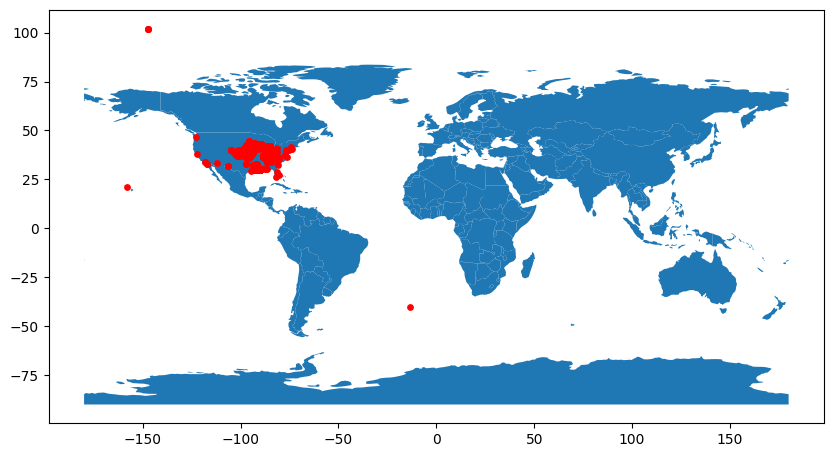

In [26]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = GeoDataFrame(data, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);


From the above map it is clear that most of the houses are from the united states. Which are in between longitudes -100 to -50 and lattitudes 25 to 50

**Numerical Features**

Discrete variables

In [27]:
#  let's make a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in ['id', 'price']]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


In [28]:
# let's visualise the discrete variables

data[discrete_vars].head()

,beds,baths
0,2,1.0
1,2,2.0
2,4,2.0
3,4,2.0
4,1,1.0


These discrete variables refer to the number of rooms and bathrooms. Let's go ahead and analyse their contribution to the house price.

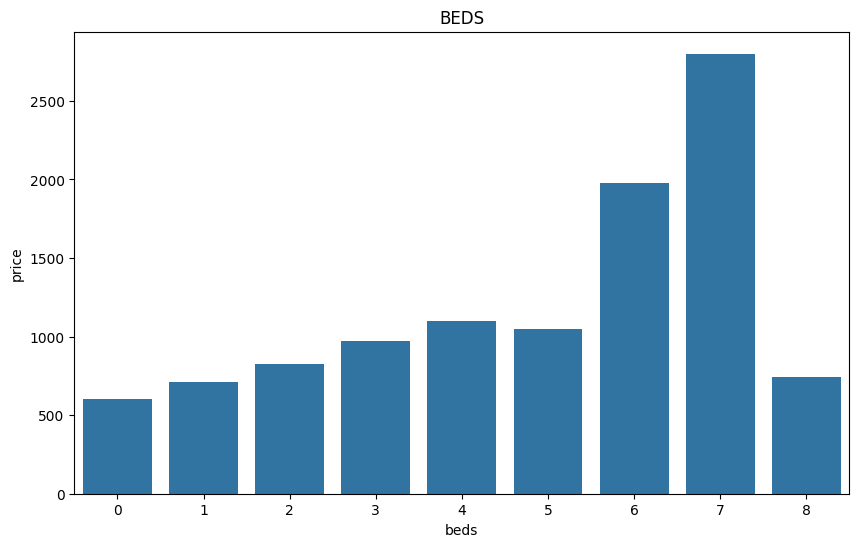

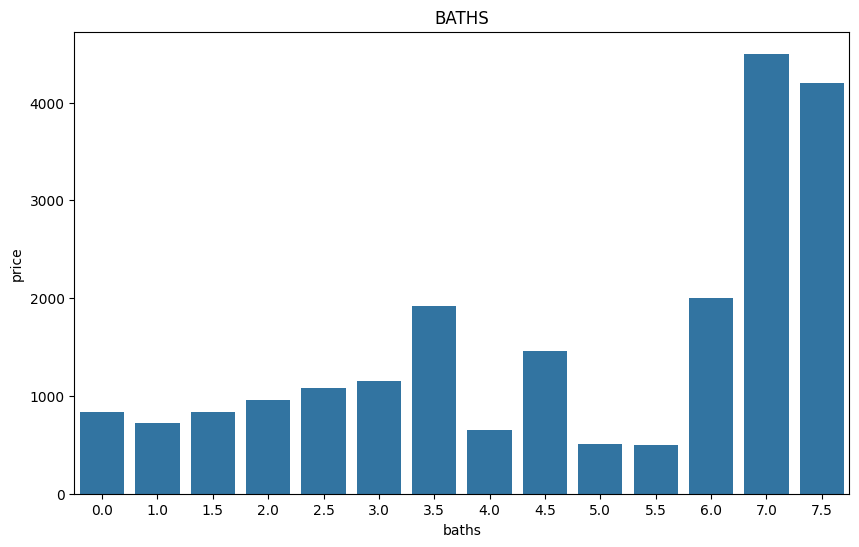

In [29]:
def analyse_discrete(df, var):
    df = df.copy()
    grs = df.groupby(var)['price'].median().reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(x=grs[var], y=grs['price'])
    plt.title(var.upper())
    plt.show()


for var in discrete_vars:
    analyse_discrete(data, var)

There tend to be a relationship between the variables values and the price, but this relationship is not always monotonic.

For example, for beds, there is a monotonic relationship: the higher the quantity, the higher the price.

However, for baths, the relationship is not monotonic. Clearly, some baths number, like 8.5, correlate with higher sale prices, but higher values do not necessarily do so.

Continuous variables

In [30]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars+['id']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  4


In [31]:
# let's visualise the continuous variables

data[cont_vars].head()

,price,sqfeet,lat,long
0,734,960,41.3590,-85.0468
1,711,980,41.1233,-85.1051
2,600,1782,41.0429,-85.1368
3,1199,1568,41.1468,-85.2067
4,733,682,41.0508,-85.2560


**Dist Plot before log transformation**

<ipython-input-32-18b257e1d592>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], hist=True)


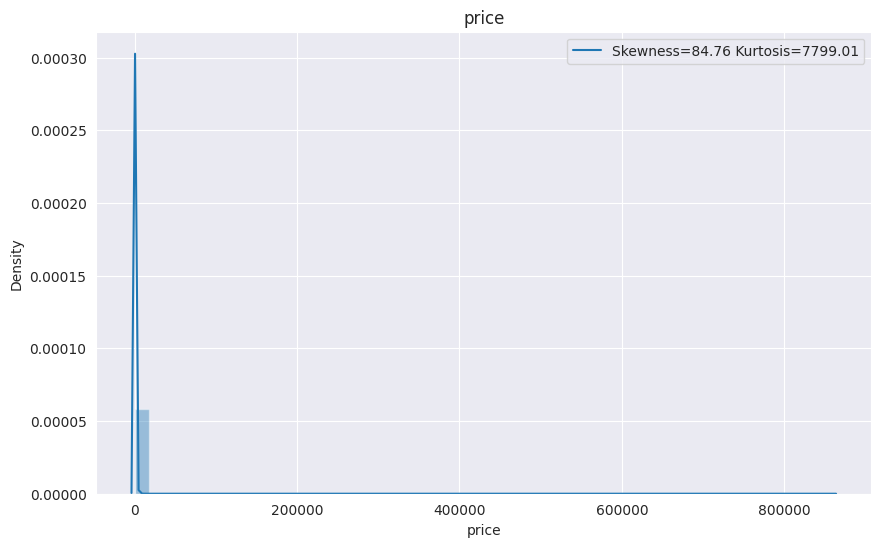

<ipython-input-32-18b257e1d592>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], hist=True)


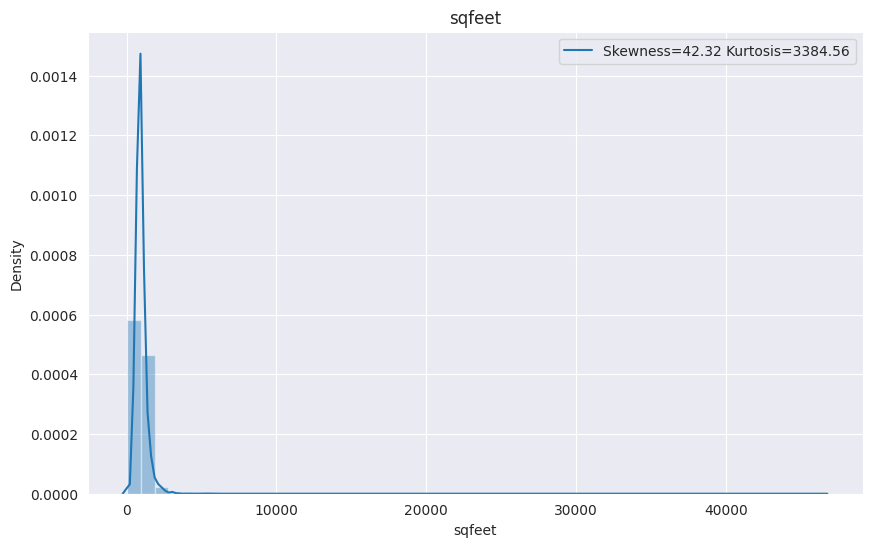

<ipython-input-32-18b257e1d592>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], hist=True)


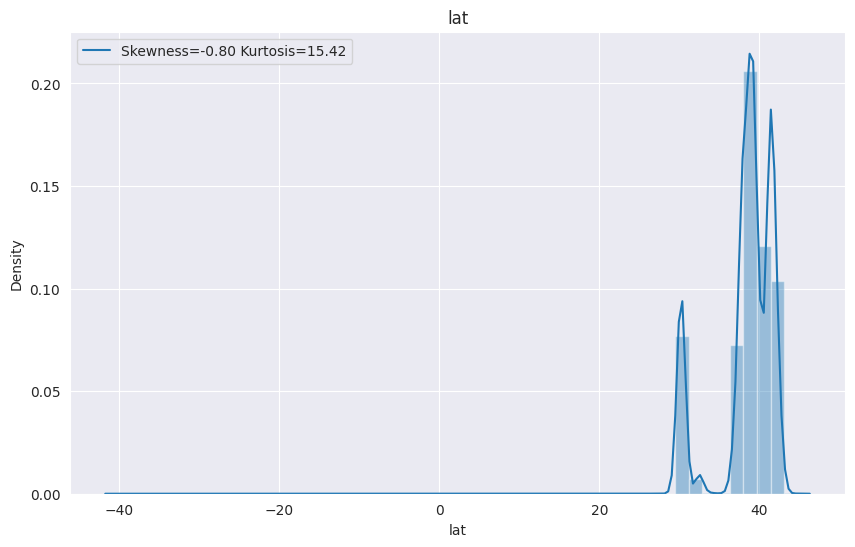

<ipython-input-32-18b257e1d592>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], hist=True)


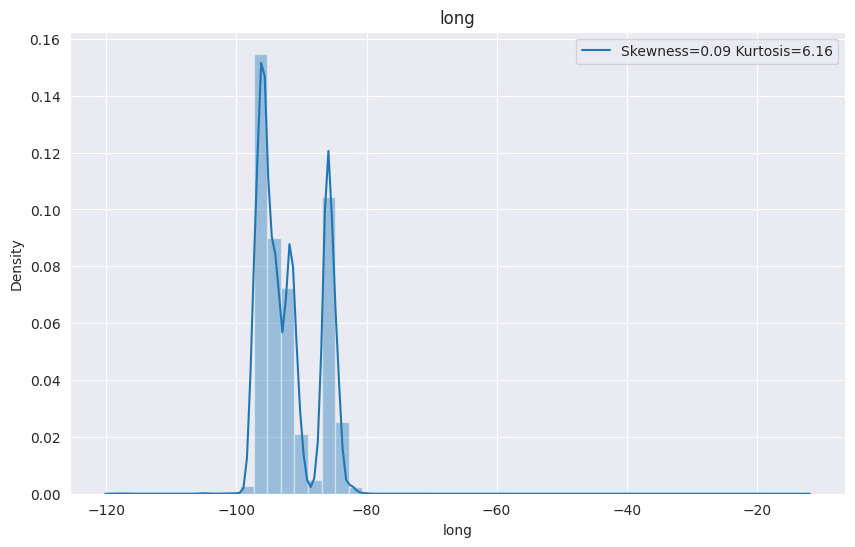

In [32]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continuous(df, var):
    df = df.copy()
    df = df.dropna(axis=0)
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.distplot(df[var], hist=True)
    plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            data[var].skew(),
            data[var].kurt())
        ],
        loc='best')
    plt.title(var)
    plt.show()

for var in cont_vars:
    analyse_continuous(data, var)

The variables are not normally distributed, including the target variable 'price'.

To maximise performance of linear models, we need to account for non-Gaussian distributions.

**Dist Plot after log transformation**

<ipython-input-33-df13b07e5909>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], hist=True)


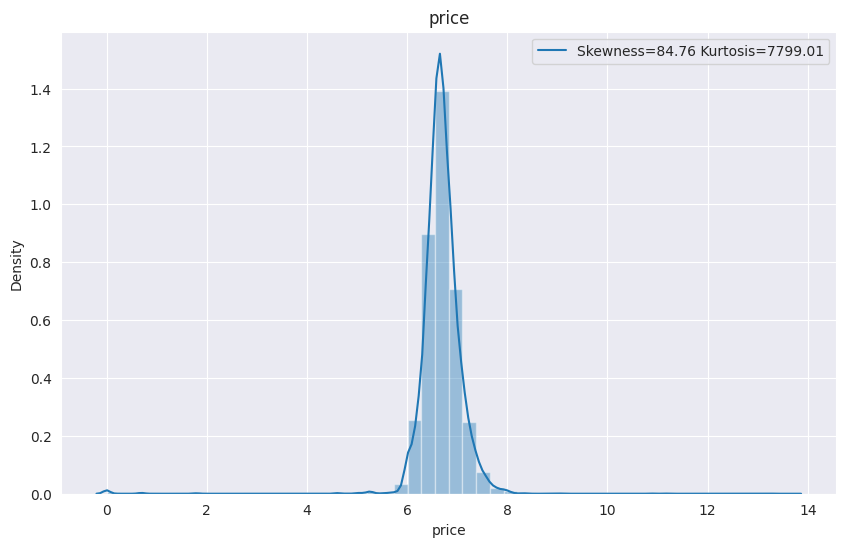

<ipython-input-33-df13b07e5909>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], hist=True)


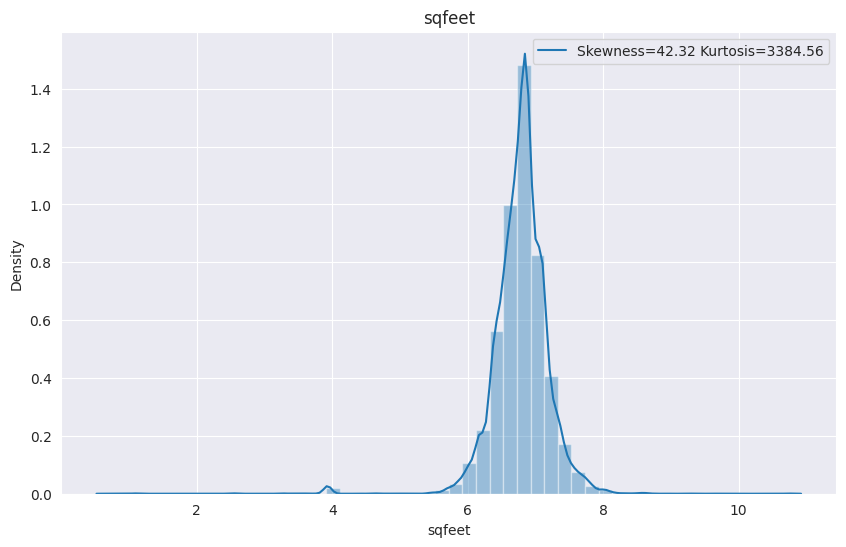

<ipython-input-33-df13b07e5909>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], hist=True)


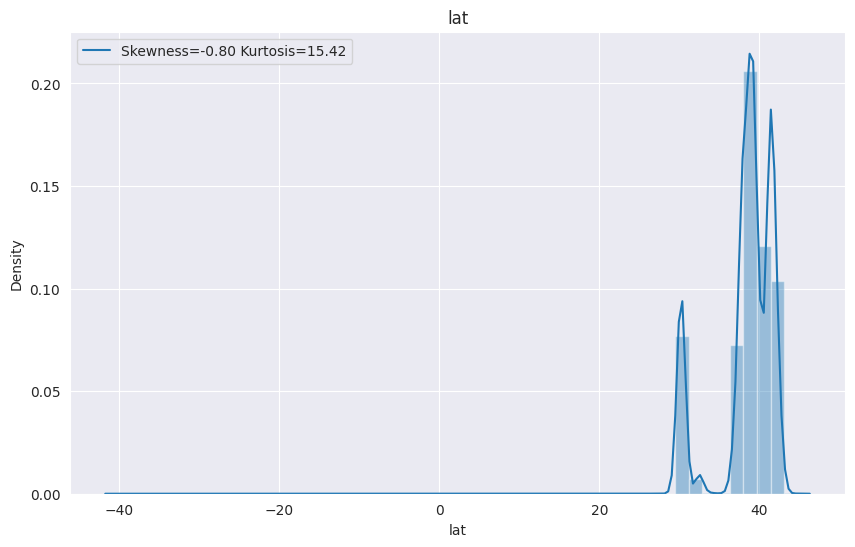

<ipython-input-33-df13b07e5909>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], hist=True)


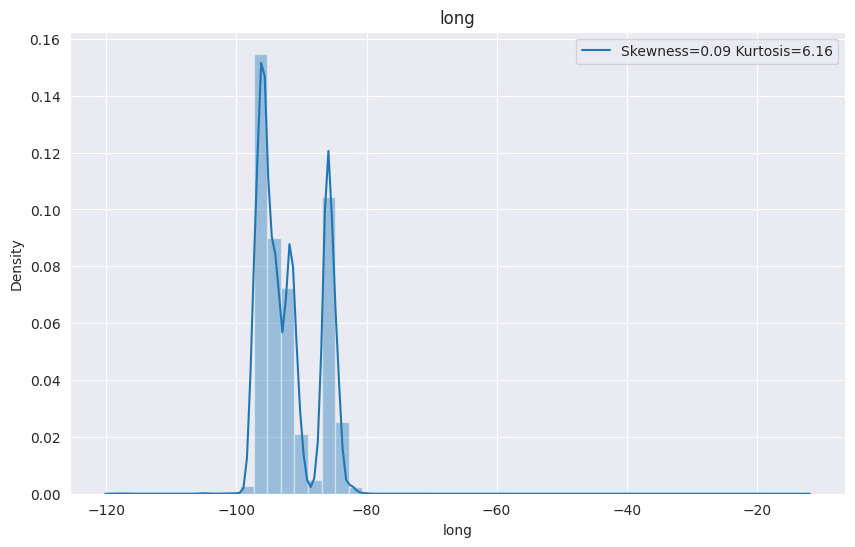

In [33]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation
def analyse_transformed_continuous(df, var):
    df = df.copy()
    df = df.dropna(axis=0)

    # log does not take 0 or negative values, so let's be
    # careful and skip those variables
    if var == 'lat' or var == 'long':
        pass
    else:
        # log transform the variable
        df[var] = np.log1p(df[var])
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.distplot(df[var], hist=True)
    plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            data[var].skew(),
            data[var].kurt())
        ],
        loc='best')
    plt.title(var)
    plt.show()


for var in cont_vars:
    analyse_transformed_continuous(data, var)

We get a better spread of the values for most variables when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model.

From the previous plots, we observe some monotonic associations between price and the variables to which we applied the log transformation, for example 'sqfeet'.

## **Outliers**
Extreme values may affect the performance of a linear model. Let's find out if we have any in our variables.

### **Box Plot**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-34-23cddd58a557>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=data[var], palette="muted", orient="vertical")


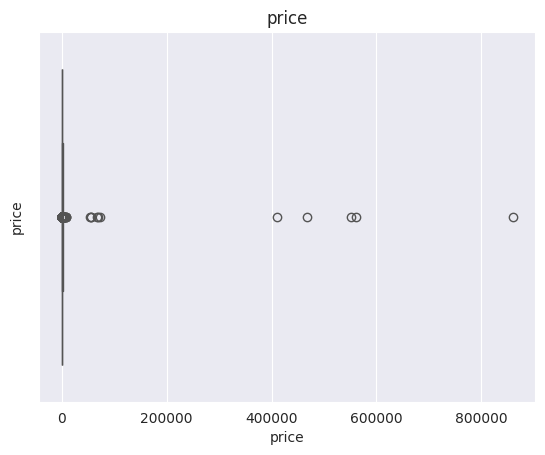

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-34-23cddd58a557>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=data[var], palette="muted", orient="vertical")


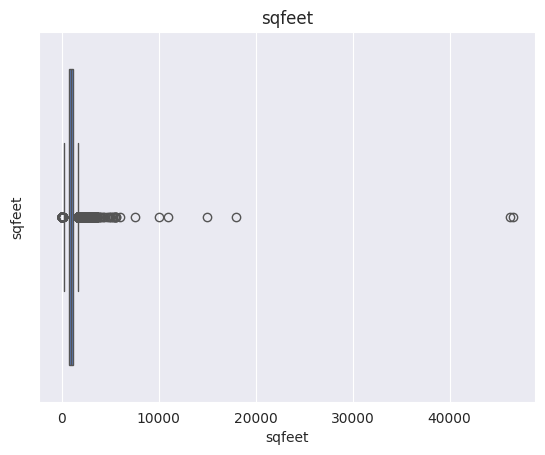

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-34-23cddd58a557>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=data[var], palette="muted", orient="vertical")


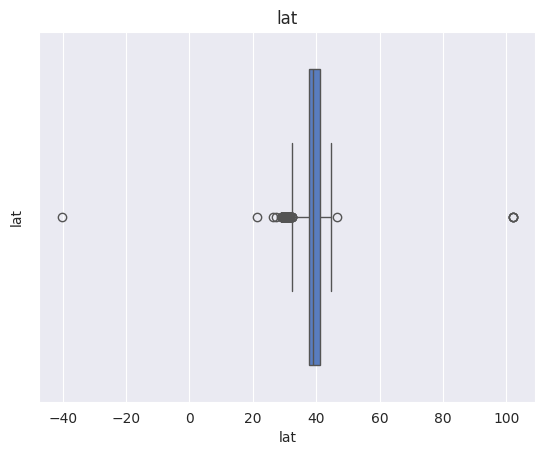

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-34-23cddd58a557>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=data[var], palette="muted", orient="vertical")


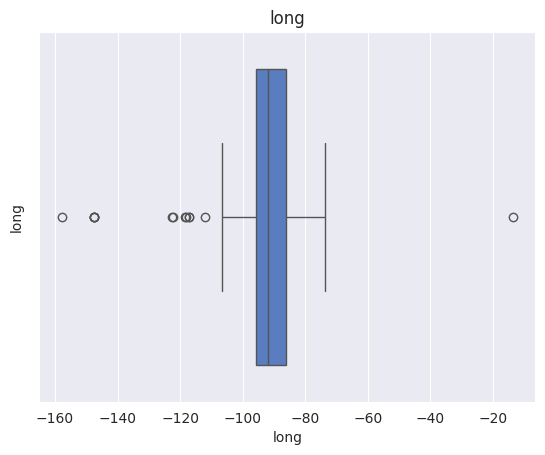

In [34]:
# let's make boxplots to visualise outliers in the continuous variables


def find_outliers(df, var):
    df = df.copy()

    # log does not take negative values, so let's be
    # careful and skip those variables
    if var == 'lat' or var == 'long':
        pass
    else:
        # log transform the variable
        df[var] = np.log1p(df[var])
    ax = sns.boxplot(x=data[var], palette="muted", orient="vertical")
    plt.title(var)
    plt.ylabel(var)
    plt.show()


for var in cont_vars:
    find_outliers(data, var)


**IQR**

In [35]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

**Standard Deviation**

In [36]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

**Price**

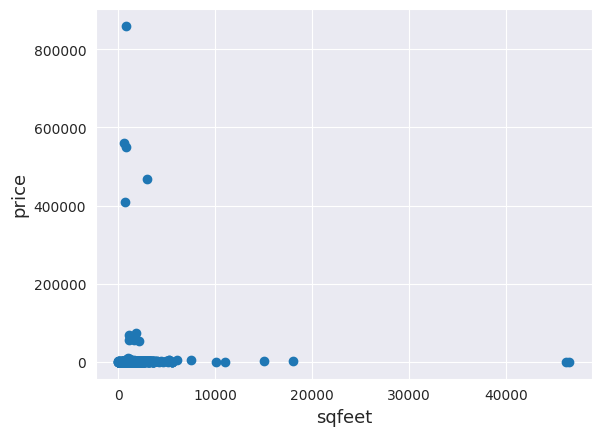

In [37]:
fig, ax = plt.subplots()
ax.scatter(x = data['sqfeet'], y = data['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('sqfeet', fontsize=13)
plt.show()

**IQR**

In [38]:
out_iqr(data, 'price')

The IQR is 291.0
The lower bound value is 242.5
The upper bound value is 1406.5
Total number of outliers are 1505


**STD**

In [39]:
out_std(data,'price')

The lower bound value is -22044.010937482937
The upper bound value is 23966.920567803947
Total number of outliers are 11


**sqfeet**

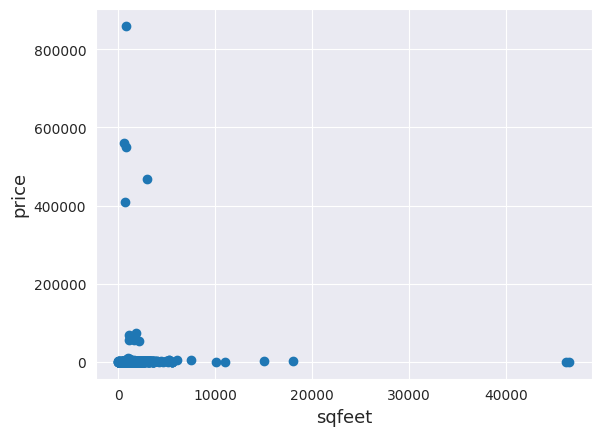

In [40]:
fig, ax = plt.subplots()
ax.scatter(x = data['sqfeet'], y = data['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('sqfeet', fontsize=13)
plt.show()

**IQR**

In [41]:
out_iqr(data, 'sqfeet')

The IQR is 374.5
The lower bound value is 168.25
The upper bound value is 1666.25
Total number of outliers are 1183


**STD**

In [42]:
out_std(data,'sqfeet')

The lower bound value is -660.6910304558905
The upper bound value is 2580.159012721966
Total number of outliers are 135


**Beds**

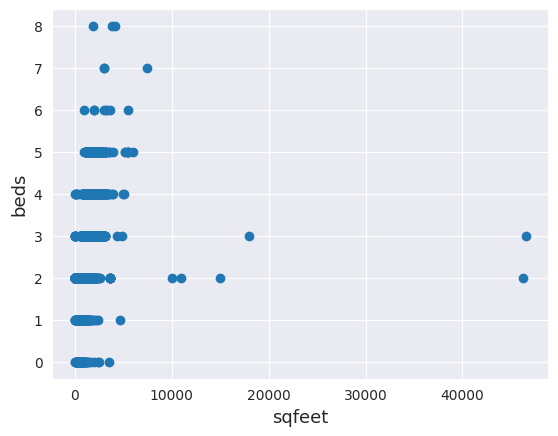

In [43]:
fig, ax = plt.subplots()
ax.scatter(x = data['sqfeet'], y = data['beds'])
plt.ylabel('beds', fontsize=13)
plt.xlabel('sqfeet', fontsize=13)
plt.show()

**IQR**

In [44]:
out_iqr(data, 'beds')

The IQR is 1.0
The lower bound value is -0.5
The upper bound value is 3.5
Total number of outliers are 1038


**STD**

In [45]:
out_std(data,'beds')

The lower bound value is -0.7740981298749798
The upper bound value is 4.556157531855046
Total number of outliers are 229


**Baths**

**IQR**

In [46]:
out_iqr(data, 'baths')

The IQR is 1.0
The lower bound value is -0.5
The upper bound value is 3.5
Total number of outliers are 141


**STD**

In [47]:
out_std(data,'baths')

The lower bound value is -0.28835603223268524
The upper bound value is 3.141684476514161
Total number of outliers are 193


**LAT**

**IQR**

In [48]:
out_iqr(data.dropna(axis=0), 'lat')

The IQR is 3.2723000000000013
The lower bound value is 33.05555
The upper bound value is 46.14475
Total number of outliers are 2776


**LONG**

**IQR**

In [49]:
out_iqr(data.dropna(axis=0), 'long')

The IQR is 9.332899999999995
The lower bound value is -109.75514999999999
The upper bound value is -72.42355
Total number of outliers are 5


**Categorical variables**

In [50]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  9


In [51]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

,url,region,region_url,type,laundry_options,parking_options,image_url,description,state
0,https://fortwayne.craigslist.org/apa/d/auburn-...,fort wayne,https://fortwayne.craigslist.org,apartment,laundry in bldg,off-street parking,https://images.craigslist.org/00g0g_87LfVy6B3s...,Apply online @ www.griswoldestatesapts.com M...,in
1,https://fortwayne.craigslist.org/apa/d/fort-wa...,fort wayne,https://fortwayne.craigslist.org,apartment,NaN,NaN,https://images.craigslist.org/00I0I_7RzcCeYCX0...,Canterbury Greenhttps://www.gocanterburygreen....,in
2,https://fortwayne.craigslist.org/apa/d/fort-wa...,fort wayne,https://fortwayne.craigslist.org,apartment,w/d in unit,attached garage,https://images.craigslist.org/00404_3ejqNiPJQc...,Spectacularly refurbished 2-story in the '07 -...,in
3,https://fortwayne.craigslist.org/apa/d/fort-wa...,fort wayne,https://fortwayne.craigslist.org,manufactured,w/d in unit,detached garage,https://images.craigslist.org/00u0u_cC9vbPkSL9...,4 Bedroom/2 Bath 7010 Kensington Drive East F...,in
4,https://fortwayne.craigslist.org/apa/d/fort-wa...,fort wayne,https://fortwayne.craigslist.org,apartment,w/d in unit,off-street parking,https://images.craigslist.org/01616_2HagGUtvgO...,1 Bedroom 1 Bathroom | 682 sq ft | $733 - $89...,in


**Number of labels: cardinality**

Let's evaluate how many different categories are present in each of the variables.

In [52]:
data[cat_vars].nunique().sort_values(ascending=False)

url                29999
description        19028
image_url          13930
region                43
region_url            43
type                  10
parking_options        7
laundry_options        5
state                  5
dtype: int64

In [53]:
data[cat_vars].nunique() / len(data)

url                1.000000
region             0.001433
region_url         0.001433
type               0.000333
laundry_options    0.000167
parking_options    0.000233
image_url          0.464349
description        0.634288
state              0.000167
dtype: float64

Variables like url, image_url, description has high cardinality. It is worth mentioning that each of houses may have differt values for these variables. Hence the high cardinality. So it okay to remove these. Also region_url contains the region, so dropping region_url will not affect our model.

In [54]:
# recapture categorical variables in a list
cat_vars = [var for var in cat_vars if var not in ['url', 'image_url', 'description', 'region_url']]

In [55]:
data[cat_vars].nunique()

region             43
type               10
laundry_options     5
parking_options     7
state               5
dtype: int64

All the categorical variables show low cardinality(except region), this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering lecture.


**Rare labels**


In [56]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['price'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

region
central louisiana             0.003367
dubuque                       0.002767
eastern kentucky              0.001900
fort dodge                    0.003700
houma                         0.007367
huntington-ashland            0.004233
kokomo                        0.002567
lafayette / west lafayette    0.009767
mason city                    0.000833
monroe                        0.007800
muncie / anderson             0.009334
northwest KS                  0.002633
owensboro                     0.000600
richmond                      0.003133
salina                        0.001233
shreveport                    0.000067
southeast IA                  0.001900
southeast KS                  0.004100
southwest KS                  0.001433
terre haute                   0.003200
western KY                    0.002267
Name: price, dtype: float64

type
cottage/cabin    0.001133
flat             0.000833
in-law           0.000100
loft             0.004333
Name: price, dtype: float64

laundry

**Frequent labels**

In [57]:
def find_frequent_labels(df, var, rare_perc):
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset
    df = df.copy()
    tmp = df.groupby(var)['price'].count() / len(df)
    return tmp[tmp > rare_perc].index.values

frequent_ls = {}
for var in cat_vars:
    frequent_ls[var] = find_frequent_labels(data, var, 0.01)

frequent_ls

{'region': array(['ames', 'baton rouge', 'bowling green', 'cedar rapids',
        'des moines', 'fort wayne', 'indianapolis', 'iowa city',
        'kansas city, MO', 'lafayette', 'lake charles', 'lawrence',
        'lexington', 'louisville', 'manhattan', 'new orleans',
        'omaha / council bluffs', 'sioux city', 'south bend / michiana',
        'topeka', 'waterloo / cedar falls', 'wichita'], dtype=object),
 'type': array(['apartment', 'condo', 'duplex', 'house', 'manufactured',
        'townhouse'], dtype=object),
 'laundry_options': array(['laundry in bldg', 'laundry on site', 'w/d hookups', 'w/d in unit'],
       dtype=object),
 'parking_options': array(['attached garage', 'carport', 'detached garage',
        'off-street parking', 'street parking'], dtype=object),
 'state': array(['ia', 'in', 'ks', 'ky', 'la'], dtype=object)}

### **Type**

**Pie Plot**

In [58]:
grdsp = data.groupby(["type"])[["price"]].mean().reset_index()

fig = px.pie(grdsp,
             values="price",
             names="type",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

We can see that the majority of the houses are of type duplex with around 20% of the total records.

**State**

In [59]:
data['state'].value_counts().sort_values(ascending=False)

state
ks    7910
ia    7471
ky    5419
la    5008
in    4191
Name: count, dtype: int64

**Scatter Plot**

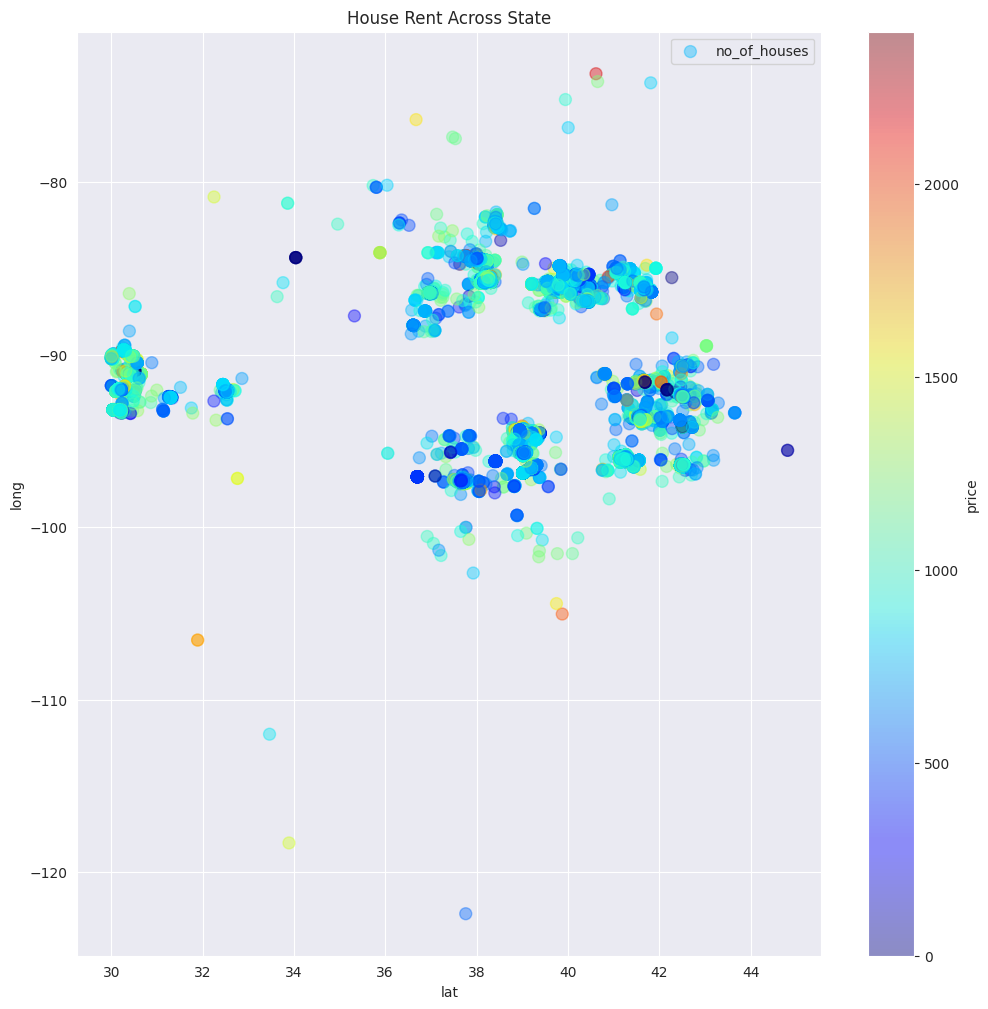

In [60]:
df = data[((data['long']>-125) & (data['long']<-45)) & ((data['lat']>30) & (data['lat']<45))]
df = df[df.price<2400]
df.plot(kind="scatter", x="lat", y="long", alpha=0.4,
        s=df["state"].value_counts()[1]/100, label="no_of_houses",
        c="price", cmap=plt.get_cmap("jet"), colorbar=True,
       figsize=(12,12))
plt.title('House Rent Across State')
plt.legend()

The radius of each circle represents the state’s house count (option s), and the color represents the price (option c). The range is from blue (low values) to red (high prices)

**Region**

In [61]:
data['region'].value_counts().sort_values(ascending=False)

region
omaha / council bluffs        2725
des moines                    2277
lexington                     2266
topeka                        2244
indianapolis                  2116
wichita                       1985
louisville                    1865
baton rouge                   1854
kansas city, MO               1783
lafayette                     1546
manhattan                     1084
bowling green                 1018
cedar rapids                   754
south bend / michiana          683
new orleans                    681
fort wayne                     552
lawrence                       532
sioux city                     406
iowa city                      380
lake charles                   369
ames                           343
waterloo / cedar falls         310
lafayette / west lafayette     293
muncie / anderson              280
monroe                         234
houma                          221
huntington-ashland             127
southeast KS                   123
fort dodge   

**Scatter Plot**

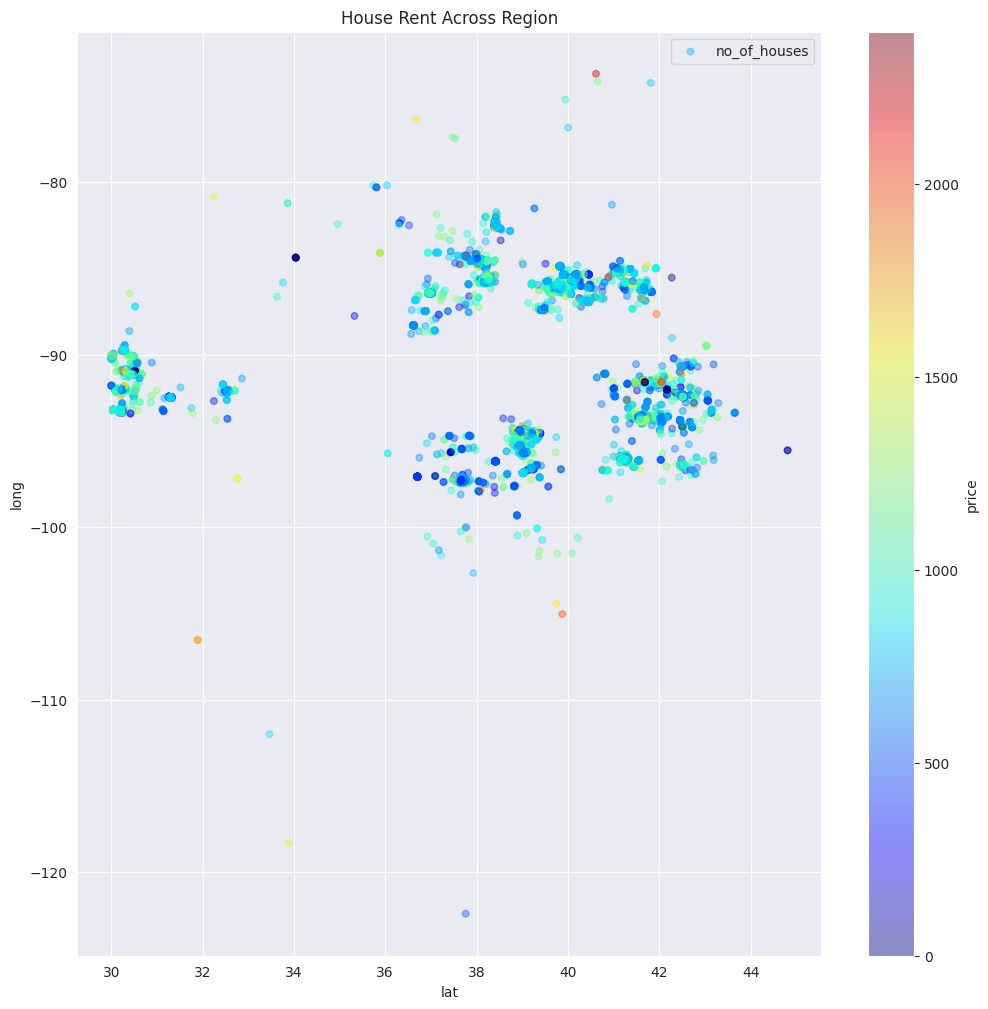

In [62]:
df = data[((data['long']>-125) & (data['long']<-45)) & ((data['lat']>30) & (data['lat']<45))]
df = df[df.price<2400]
df.plot(kind="scatter", x="lat", y="long", alpha=0.4,
        s=df["region"].value_counts()[1]/100, label="no_of_houses",
        c="price", cmap=plt.get_cmap("jet"), colorbar=True,
        figsize=(12,12))
plt.title('House Rent Across Region')
plt.legend()

The radius of each circle represents the region’s house count (option s), and the color represents the price (option c). The range is from blue (low values) to red (high prices)

## **Correlation**

**Correlation Heatmap**

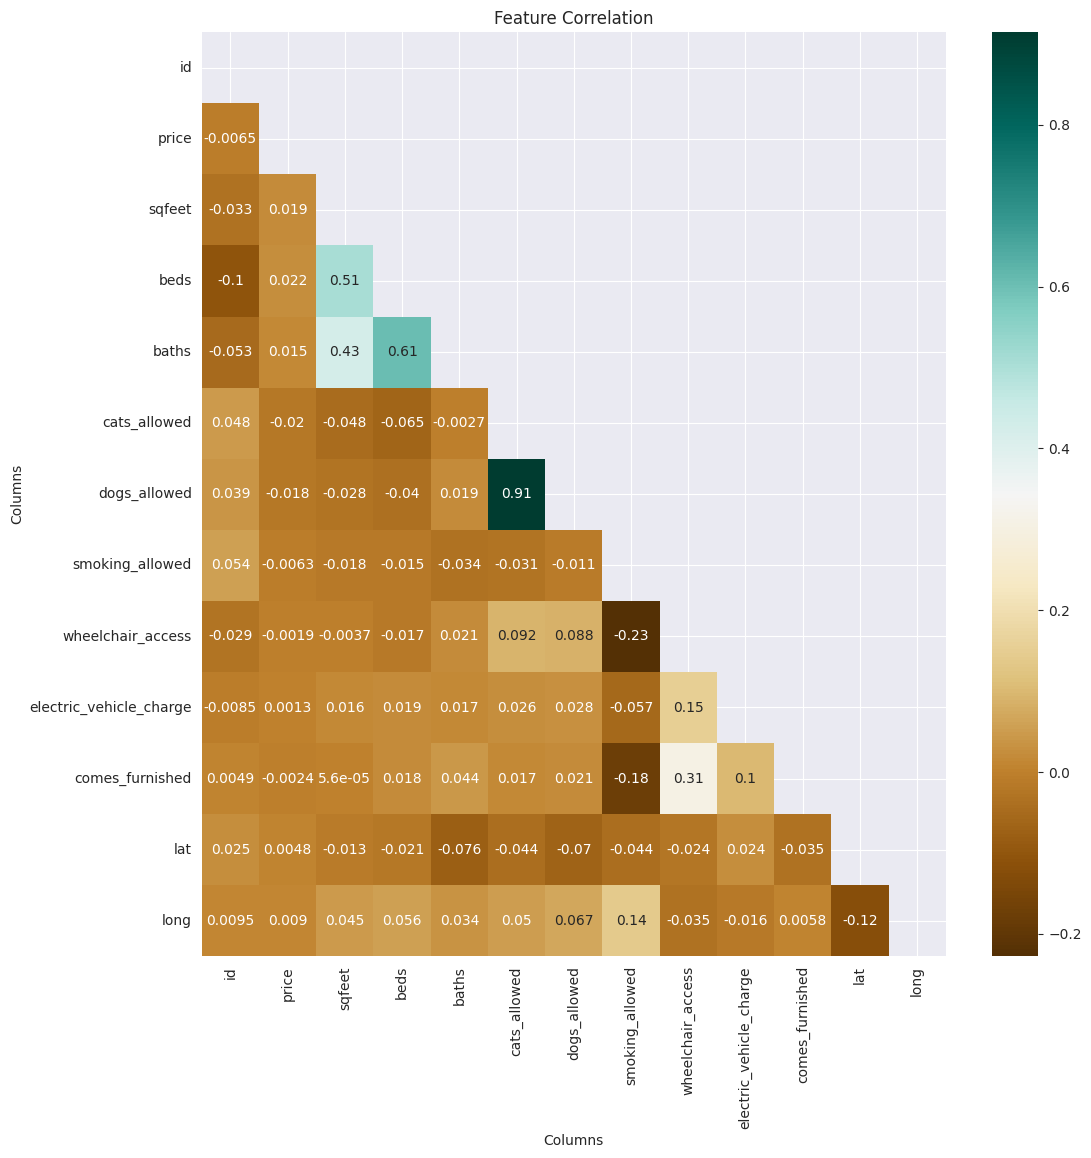

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr_matrix,
            annot=True,
            mask=mask,
            ax=ax,
            cmap='BrBG').set(
    title='Feature Correlation', xlabel='Columns', ylabel='Columns')

ax.set_yticklabels(corr_matrix.columns, rotation=0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


There's hardly any correlation among the independent and dependent features.

Some insights from the above correlation heatmap:
1. expected stronge correlation between beds and baths

2. unexpected correlation between smoking_allowed and lat

3. unexpected correlation between smoking_allowed and infant_mortality

4. expected stronge correlation between cats_allowed and dogs_allowed

## **House Rent dataset: Feature Engineering**

In [64]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')

In [65]:
data = pd.read_csv('AML_mainDS.csv')
data.shape

(29999, 22)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29999 non-null  int64  
 1   url                      29999 non-null  object 
 2   region                   29999 non-null  object 
 3   region_url               29999 non-null  object 
 4   price                    29999 non-null  int64  
 5   type                     29999 non-null  object 
 6   sqfeet                   29999 non-null  int64  
 7   beds                     29999 non-null  int64  
 8   baths                    29999 non-null  float64
 9   cats_allowed             29999 non-null  int64  
 10  dogs_allowed             29999 non-null  int64  
 11  smoking_allowed          29999 non-null  int64  
 12  wheelchair_access        29999 non-null  int64  
 13  electric_vehicle_charge  29999 non-null  int64  
 14  comes_furnished       

**Data Cleaning**

Getting appropriate data types. For example baths have a dtype of float, and it contains some decimal values. But it is a quantitative variable. So transforming it to remove decimal.

In [67]:
data['baths'] = np.ceil(data['baths'])
data['baths'] = data['baths'].astype(int)

**Missing values**

**Categorical variables**

In [68]:
# make a list of the categorical variables that contain missing values
cat_var_na = ['laundry_options', 'parking_options']

In [69]:
def impute_missing_cat(data, var, modeof):
    return data.groupby(modeof)[var].transform(
        lambda x: x.fillna(x.mode()[0]))

In [70]:
data["laundry_options"] = impute_missing_cat(data, "laundry_options", "type")
data["parking_options"] = impute_missing_cat(data, "parking_options", "type")
data = data.dropna(subset=["state", "description"],axis=0)

**Numerical variables**

In [71]:
# make a list with the numerical variables that contain missing values
num_var_na = ['lat', 'long']

In [72]:
def impute_missing_num(data, var, meanof):
    return data.groupby(meanof)[var].transform(
        lambda x: x.fillna(x.mode()[0]))

In [73]:
data["lat"] = impute_missing_num(data, "lat", "region")
data["long"] = impute_missing_num(data, "long", "region")

In [74]:
#Check remaining missing values if any
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [75]:
data.shape

(29999, 22)

**Outliers**

In EDA, we decided to remove outliers according to the upper and lower bound of its interquartile range.

In [76]:
price_upper, price_lower = 2400, 1
sqfeet_upper, sqfeet_lower = 1762, 1
beds_upper, beds_lower = 3, 1
baths_upper, baths_lower = 3, 1

data = data[(data['price'] <= price_upper) & (data['price'] >= price_lower)]
data = data[(data['sqfeet'] <= sqfeet_upper) & (data['sqfeet'] >= sqfeet_lower)]
data = data[(data['beds'] <= beds_upper) & (data['beds'] >= beds_lower)]
data = data[(data['baths'] <= baths_upper) & (data['baths'] >= baths_lower)]

In [77]:
data.shape

(26930, 22)

**Getting More Features**

In [78]:
data['premium_house'] = np.where((data['baths']>=data['beds'])&(data['beds']>1),1,0)
data['pets_allowed'] = np.where((data['cats_allowed']==1)&data['dogs_allowed']==1,1,0)
data['beds_per_sqfeet'] = data['beds'] / data['sqfeet']
data['baths_per_beds'] = data['baths'] / data['beds']

**Exploring 'description' column**

In [79]:
data.description[5000].lower()

'updated ranch style available for rent near irish democrat and raining rose! this 2 bed/1 bath tiny-home is perfect for any young couple or small family! one main-floor bedroom, additional office/playroom, and large upstairs bedroom give you plenty of room! an eat-in kitchen with a walkout back-door to a huge fenced yard encompassing an oversized 2-stall garage! enjoy the quiet serenity with the empty lot across the street and grove of forestry beyond that! tenants responsible for all utilities and full online rent payment and personal tenant information portal is available for your convenience!  pets welcome with additional fees.  apply online! fast & easy! (copy & paste url) ammtllc.managebuilding.com/resident/apps/rentalapp/  schedule a showing here! (copy & paste url) ammtllc.managebuilding.com/resident/public/custom/20  rent: $800-$900 *depending on credit and background  ammt, llc  show contact info  ammtllc.managebuilding.com licensed real estate brokerage in the state of iowa 

In [80]:
[x in data.description[5000].lower() for x in ['pool', 'swimming','wi-fi','fireplace','grilling','gym','fence', 'court']]

[False, False, False, False, False, False, True, False]

Let's get some intriguing new features

In [81]:
data['has_pool'] = data['description'].apply(lambda x: 1 if 'pool' in x.lower() or 'swimming' in x.lower() else 0)
data['has_grill'] = data['description'].apply(lambda x: 1 if 'grill' in x.lower() or 'grilling' in x.lower() else 0)
data['has_fireplace'] = data['description'].apply(lambda x: 1 if 'fireplace' in x.lower() or 'fire pits' in x.lower() else 0)
data['gym_nearby'] = data['description'].apply(lambda x: 1 if 'gym' in x.lower() or 'fitness' in x.lower() else 0)
data['school/clg_nearby'] = data['description'].apply(lambda x: 1 if 'school' in x.lower() or 'college' in x.lower() else 0)
data['wifi_facilities'] = data['description'].apply(lambda x: 1 if 'wifi' in x.lower() or 'wi-fi' in x.lower() else 0)
data['valet_service'] = data['description'].apply(lambda x: 1 if 'valet' in x.lower() else 0)
data['shopping_nearby'] = data['description'].apply(lambda x: 1 if 'shopping' in x.lower() else 0)
data['sports_playground'] = data['description'].apply(lambda x: 1 if 'sport' in x.lower()  or 'sports' in x.lower()
                                                      or 'tennis' in x.lower() or 'soccer' in x.lower()
                                                      or 'soccers' in x.lower() or 'court' in x.lower() else 0)
data['dining_nearby'] = data['description'].apply(lambda x: 1 if 'dining' in x.lower() else 0)

In [82]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state', 'premium_house', 'pets_allowed', 'beds_per_sqfeet',
       'baths_per_beds', 'has_pool', 'has_grill', 'has_fireplace',
       'gym_nearby', 'school/clg_nearby', 'wifi_facilities', 'valet_service',
       'shopping_nearby', 'sports_playground', 'dining_nearby'],
      dtype='object')

In [83]:
for var in ['has_pool', 'has_grill', 'has_fireplace', 'gym_nearby',
       'school/clg_nearby', 'wifi_facilities', 'valet_service',
       'shopping_nearby', 'sports_playground', 'dining_nearby']:
    print(data[var].value_counts())

has_pool
1    14494
0    12436
Name: count, dtype: int64
has_grill
0    23028
1     3902
Name: count, dtype: int64
has_fireplace
0    22942
1     3988
Name: count, dtype: int64
gym_nearby
0    15177
1    11753
Name: count, dtype: int64
school/clg_nearby
0    21830
1     5100
Name: count, dtype: int64
wifi_facilities
0    24745
1     2185
Name: count, dtype: int64
valet_service
0    26640
1      290
Name: count, dtype: int64
shopping_nearby
0    19484
1     7446
Name: count, dtype: int64
sports_playground
0    17598
1     9332
Name: count, dtype: int64
dining_nearby
0    20341
1     6589
Name: count, dtype: int64


**Numerical variable transformation**

We will log transform the positive numerical variables in order to get a more Gaussian-like distribution. This tends to help Linear machine learning models.

In [84]:
for var in ['price','sqfeet','baths_per_beds','beds_per_sqfeet']:
    data[var] = np.log(data[var])

In [85]:
# check that data set does not contain null values in the engineered variables
[var for var in ['price','sqfeet','baths_per_beds','beds_per_sqfeet'] if data[var].isnull().sum() > 0]

[]

**Categorical variables**

Removing rare labels
First, we will group those categories within variables that are present in less than 1% of the observations. That is, all values of categorical variables that are shared by less than 1% of houses, will be replaced by the string "Rare".

In [86]:
# let's capture the categorical variables in a list

cat_vars = ['region', 'type', 'laundry_options', 'parking_options', 'state']

In [87]:
frequent_ls = {
    'region':
        ['denver', 'fayetteville', 'jacksonville', 'omaha / council bluffs', 'rochester'],
     'type':
        ['apartment', 'condo', 'duplex', 'house', 'manufactured', 'townhouse'],
     'laundry_options':
        ['laundry in bldg', 'laundry on site', 'w/d hookups', 'w/d in unit'],
     'parking_options':
        ['attached garage', 'carport', 'detached garage', 'off-street parking', 'street parking'],
     'state':
        ['al', 'ar', 'az', 'ca', 'co', 'ct', 'fl', 'ga', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la',
        'ma', 'md', 'mi', 'mn', 'ms', 'nc', 'nd', 'ne', 'nj', 'nm', 'nv', 'ny', 'oh']
}


for var in cat_vars:
    data[var] = np.where(data[var].isin(
        frequent_ls[var]), data[var], 'Rare')

**Encoding of categorical variables**

Next, we need to transform the strings of the categorical variables into numbers. We will do it so that we capture the monotonic relationship between the label and the target.

In [88]:
# this function will assign discrete values to the strings of the variables,
# so that the smaller value corresponds to the category that shows the smaller
# mean house sale price


def replace_categories(data, var, target):

    # order the categories in a variable from that with the lowest
    # house sale price, to that with the highest
    ordered_labels = data.groupby([var])[target].mean().sort_values().index

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}

    # use the dictionary to replace the categorical strings by integers
    data[var] = data[var].map(ordinal_label)

In [89]:
for var in cat_vars:
    replace_categories(data, var, 'price')

In [90]:
# check absence of na in the train set
[var for var in data.columns if data[var].isnull().sum() > 0]

[]

In [91]:
data.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,premium_house,pets_allowed,beds_per_sqfeet,baths_per_beds,has_pool,has_grill,has_fireplace,gym_nearby,school/clg_nearby,wifi_facilities,valet_service,shopping_nearby,sports_playground,dining_nearby
0,7046799953,https://fortwayne.craigslist.org/apa/d/auburn-...,0,https://fortwayne.craigslist.org,6.598509,2,6.866933,2,1,1,1,1,0,0,0,2,2,https://images.craigslist.org/00g0g_87LfVy6B3s...,Apply online @ www.griswoldestatesapts.com M...,41.3590,-85.0468,2,0,1,-6.173786,-0.693147,0,0,0,0,0,0,0,0,0,1
1,7038578060,https://fortwayne.craigslist.org/apa/d/fort-wa...,0,https://fortwayne.craigslist.org,6.566672,2,6.887553,2,2,0,0,1,0,0,0,4,2,https://images.craigslist.org/00I0I_7RzcCeYCX0...,Canterbury Greenhttps://www.gocanterburygreen....,41.1233,-85.1051,2,1,0,-6.194405,0.000000,1,1,1,0,0,0,0,0,1,0
4,7046718587,https://fortwayne.craigslist.org/apa/d/fort-wa...,0,https://fortwayne.craigslist.org,6.597146,2,6.525030,1,1,1,1,1,0,0,0,4,2,https://images.craigslist.org/01616_2HagGUtvgO...,1 Bedroom 1 Bathroom | 682 sq ft | $733 - $89...,41.0508,-85.2560,2,0,1,-6.525030,0.000000,1,0,1,1,0,0,0,0,1,0
5,7043424607,https://fortwayne.craigslist.org/apa/d/fort-wa...,0,https://fortwayne.craigslist.org,6.935370,2,7.051856,2,2,0,0,1,0,0,0,4,2,https://images.craigslist.org/00d0d_giPzcUCrQK...,Canterbury Greenhttps://www.gocanterburygreen....,41.1233,-85.1051,2,1,0,-6.358708,0.000000,1,1,1,0,0,0,0,0,1,0
6,7031549694,https://fortwayne.craigslist.org/apa/d/mo-2-1-...,0,https://fortwayne.craigslist.org,6.263398,2,6.396930,2,1,1,1,1,0,0,0,0,2,https://images.craigslist.org/00F0F_6ue9ATEFXi...,2/1 Second floor apartment- $525.00/mo with a ...,41.0867,-85.1455,2,0,1,-5.703782,-0.693147,0,0,0,0,0,0,0,0,0,0


In [92]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state', 'premium_house', 'pets_allowed', 'beds_per_sqfeet',
       'baths_per_beds', 'has_pool', 'has_grill', 'has_fireplace',
       'gym_nearby', 'school/clg_nearby', 'wifi_facilities', 'valet_service',
       'shopping_nearby', 'sports_playground', 'dining_nearby'],
      dtype='object')

In [93]:
features = ['region', 'price', 'type', 'sqfeet', 'smoking_allowed', 'wheelchair_access',
            'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options','lat', 'long',
            'premium_house', 'pets_allowed', 'beds_per_sqfeet', 'baths_per_beds', 'has_pool', 'has_grill',
            'has_fireplace', 'gym_nearby', 'school/clg_nearby', 'wifi_facilities', 'valet_service',
            'shopping_nearby', 'sports_playground', 'dining_nearby']

data_final = data[features].copy()
data_final.head()

,region,price,type,sqfeet,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,premium_house,pets_allowed,beds_per_sqfeet,baths_per_beds,has_pool,has_grill,has_fireplace,gym_nearby,school/clg_nearby,wifi_facilities,valet_service,shopping_nearby,sports_playground,dining_nearby
0,0,6.598509,2,6.866933,1,0,0,0,2,2,41.3590,-85.0468,0,1,-6.173786,-0.693147,0,0,0,0,0,0,0,0,0,1
1,0,6.566672,2,6.887553,1,0,0,0,4,2,41.1233,-85.1051,1,0,-6.194405,0.000000,1,1,1,0,0,0,0,0,1,0
4,0,6.597146,2,6.525030,1,0,0,0,4,2,41.0508,-85.2560,0,1,-6.525030,0.000000,1,0,1,1,0,0,0,0,1,0
5,0,6.935370,2,7.051856,1,0,0,0,4,2,41.1233,-85.1051,1,0,-6.358708,0.000000,1,1,1,0,0,0,0,0,1,0
6,0,6.263398,2,6.396930,1,0,0,0,0,2,41.0867,-85.1455,0,1,-5.703782,-0.693147,0,0,0,0,0,0,0,0,0,0


In [94]:
for feature in features:
    data_final[feature] = data_final[feature].astype(np.float64)

**Correlation Heatmap**

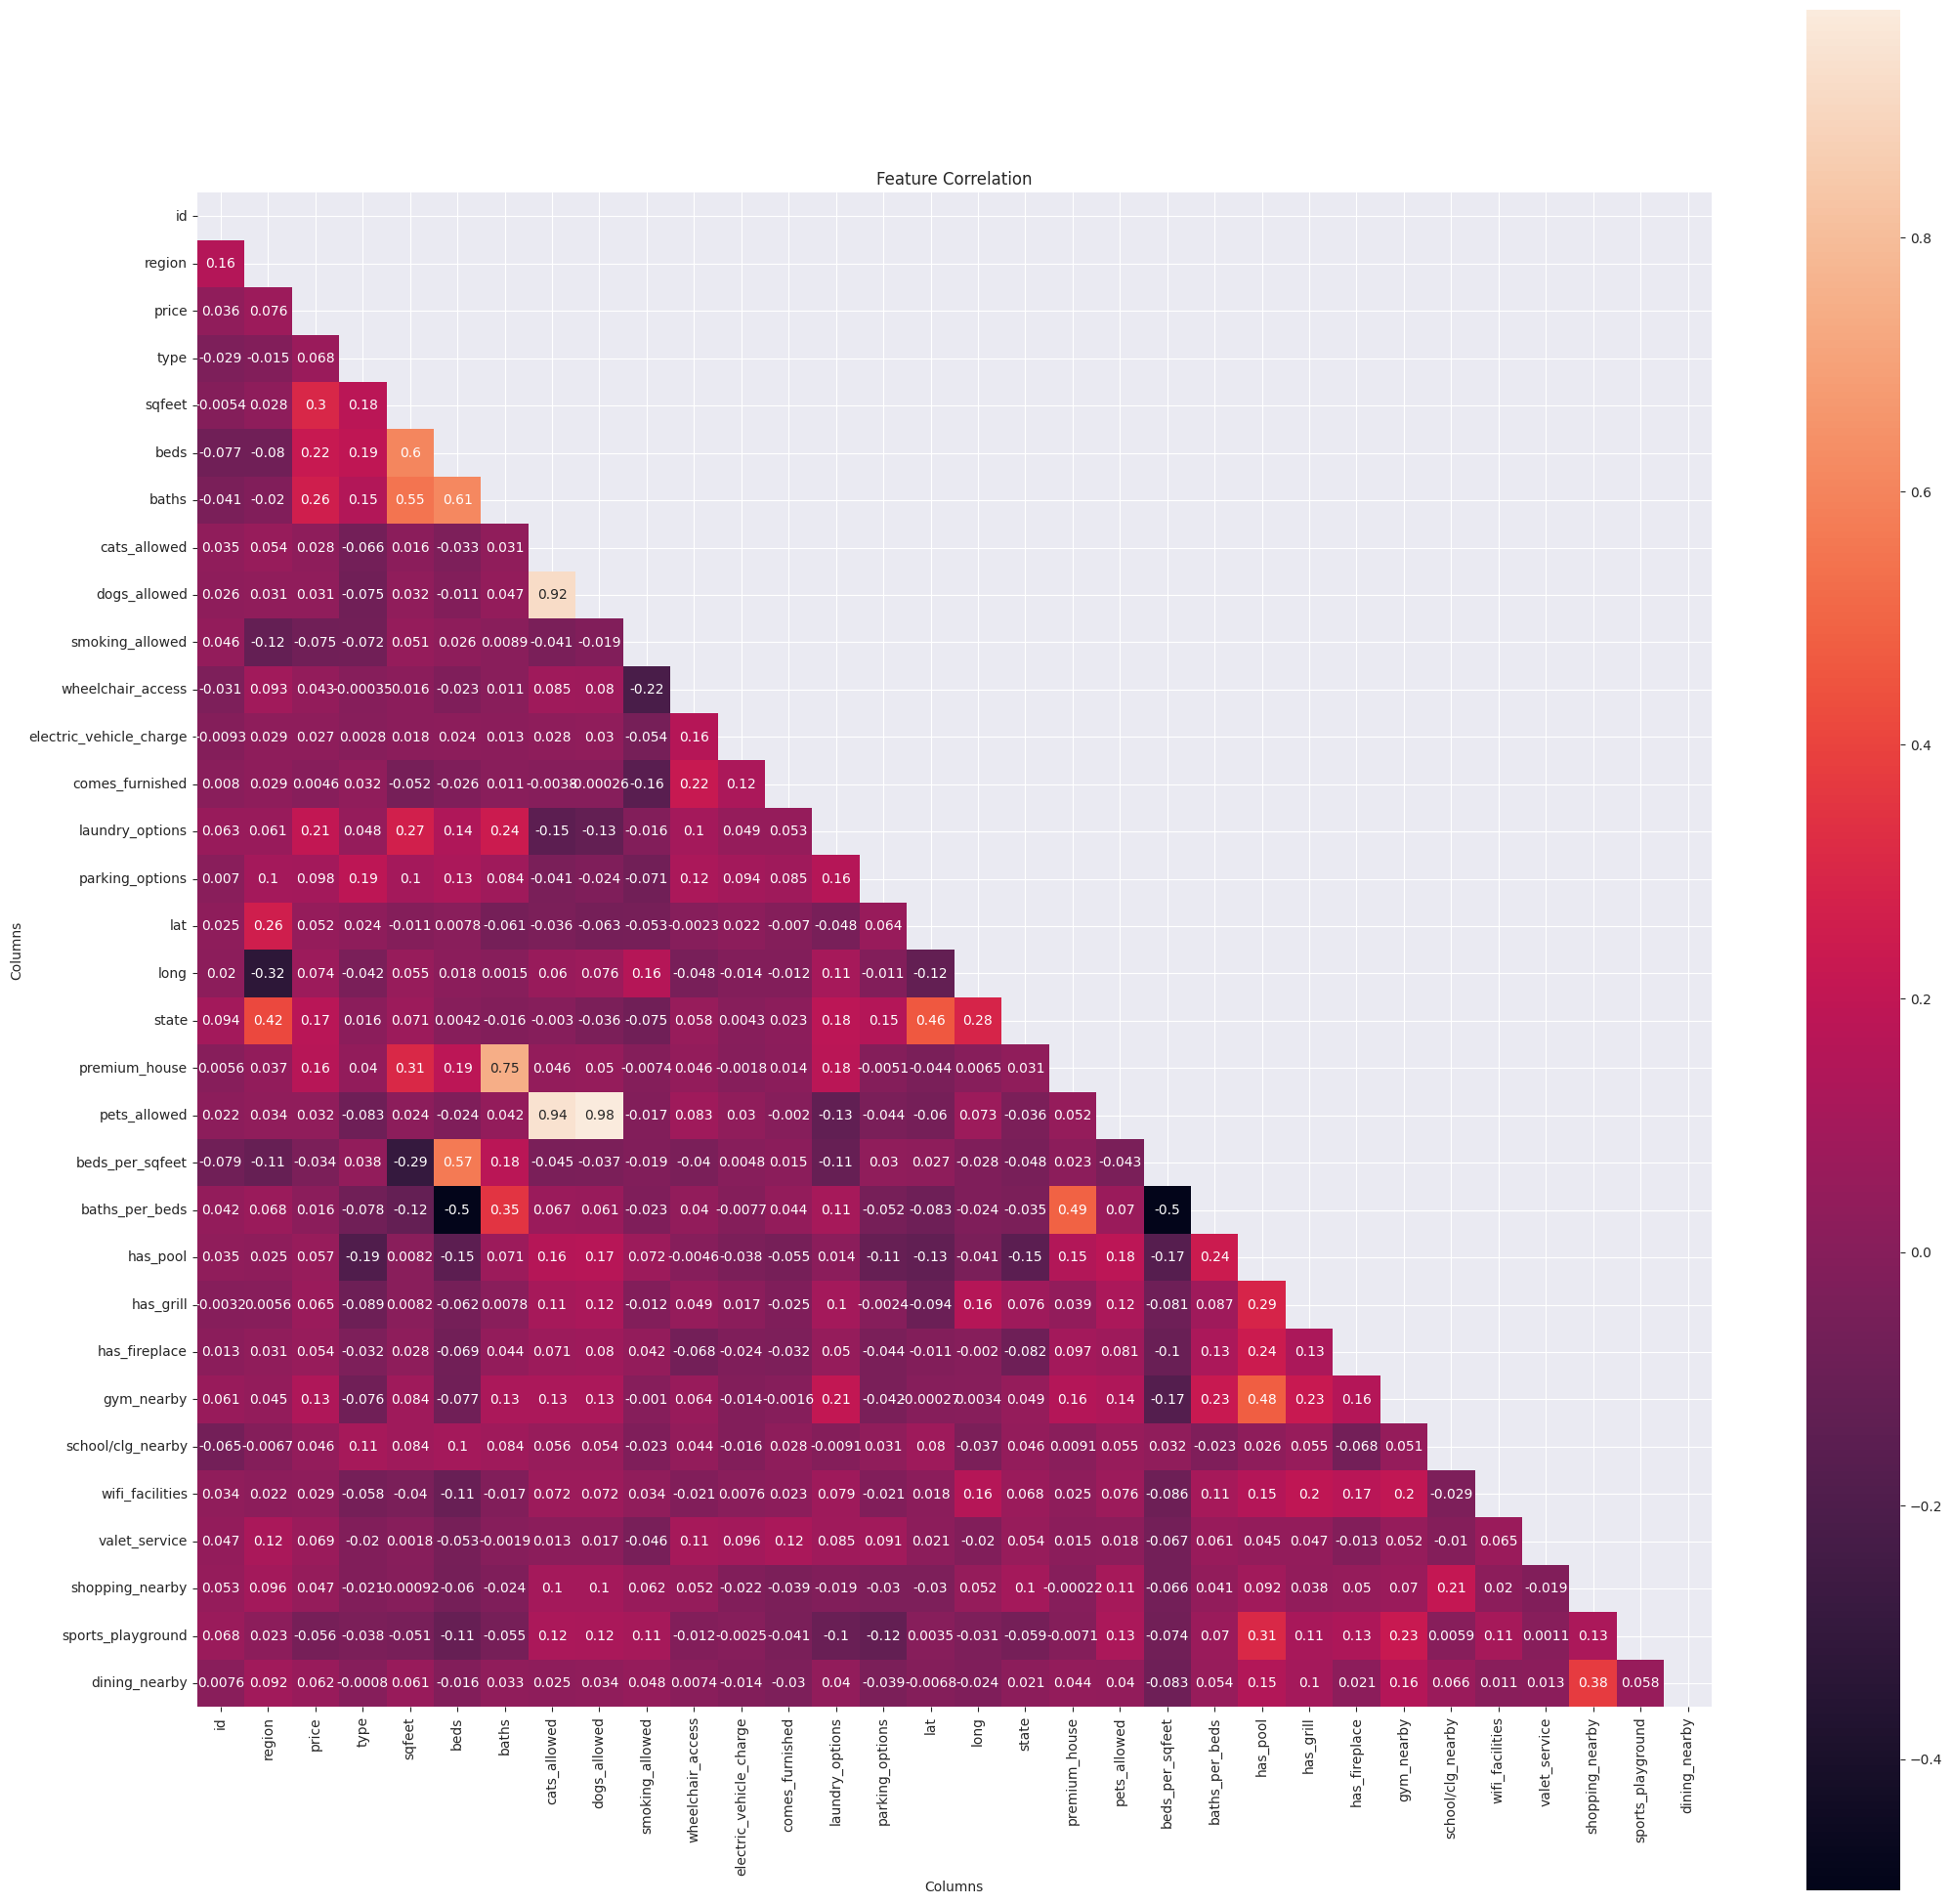

In [95]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(25, 25))

sns.heatmap(corr_matrix,
            annot=True,
            square=True,
            fmt='.2g',
            mask=mask,
            ax=ax).set(
    title='Feature Correlation', xlabel='Columns', ylabel='Columns')

ax.set_yticklabels(corr_matrix.columns, rotation=0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


In [96]:
data_final.to_csv('data_cleaned.csv', index=False)

## **House Rent dataset: Model Building**

**Importing Libraries**

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
%matplotlib inline

#ignore annoying warning (from sklearn and seaborn)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [98]:
data = pd.read_csv('data_cleaned.csv')
data.shape

(26930, 26)

In [99]:
data.head()

,region,price,type,sqfeet,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,premium_house,pets_allowed,beds_per_sqfeet,baths_per_beds,has_pool,has_grill,has_fireplace,gym_nearby,school/clg_nearby,wifi_facilities,valet_service,shopping_nearby,sports_playground,dining_nearby
0,0.0,6.598509,2.0,6.866933,1.0,0.0,0.0,0.0,2.0,2.0,41.3590,-85.0468,0.0,1.0,-6.173786,-0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,6.566672,2.0,6.887553,1.0,0.0,0.0,0.0,4.0,2.0,41.1233,-85.1051,1.0,0.0,-6.194405,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,6.597146,2.0,6.525030,1.0,0.0,0.0,0.0,4.0,2.0,41.0508,-85.2560,0.0,1.0,-6.525030,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,6.935370,2.0,7.051856,1.0,0.0,0.0,0.0,4.0,2.0,41.1233,-85.1051,1.0,0.0,-6.358708,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,6.263398,2.0,6.396930,1.0,0.0,0.0,0.0,0.0,2.0,41.0867,-85.1455,0.0,1.0,-5.703782,-0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    data.drop('price',axis=1),
                                    data['price'],
                                    test_size=0.25,
                                    random_state=0)

**Data Split 1: all of our final dataset, no scaling**

In [101]:
y = data['price']
X = data.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

**Data Split 2: all of our final dataset, with scaling**

In [102]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

**Linear Regression**

From our EDA, we can see that most features do not have a linear relationship with our labels (gdp_per_capita), yet we will try linear regression, and use the result as a reference (other methods should have better results).

**Model Training**

In [103]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

LinearRegression()

**Predictions**

In [104]:
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)

**Evaluation**

Linear Regression Performance:
MAE: 0.17730715461417976
RMSE: 0.41532339162679527
R2_Score:  0.16804718041769517


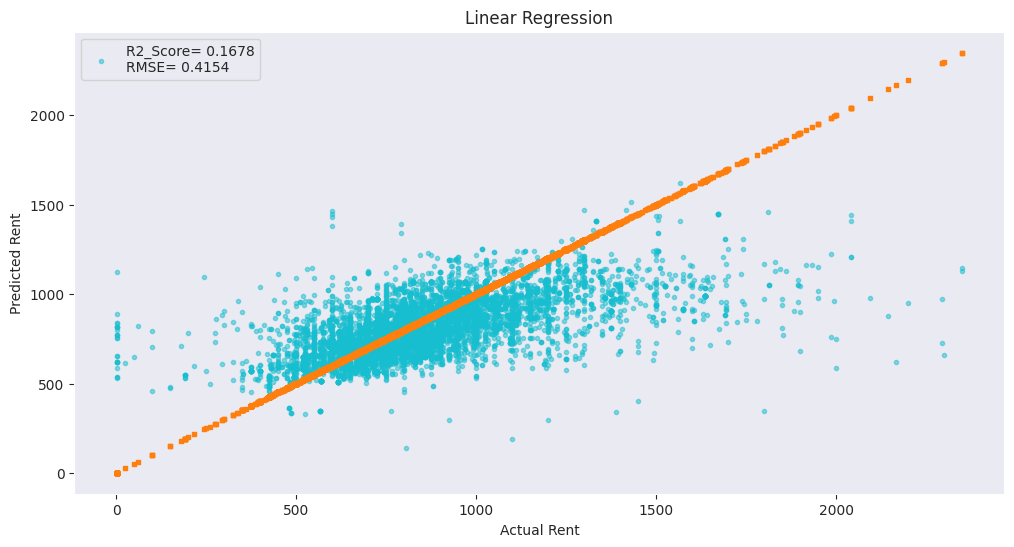

In [105]:
print('Linear Regression Performance:')


print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))


pred = pd.DataFrame(data={'Predicted_Rent': np.exp(lm2_pred), 'Actual_Rent': np.exp(y2_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y2_test, lm2_pred),
                np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
           ],
           loc='best')
plt.title('Linear Regression')
plt.grid()
plt.show()


The orange line in the graph represents the actual rents. And the cyan circles plotted against actual rents, on the x-axis, are the predicted rents.

Linear Model worked terribly, which was expected as there were no linear relationship among the features. Feature scaling has a small positive effect on LR's prediction performance.

**Lasso Regression**

Lasso Regression Performance:
MAE: 0.22864457320407328
RMSE: 0.4537503707755665
R2_Score: 0.006975645417250709


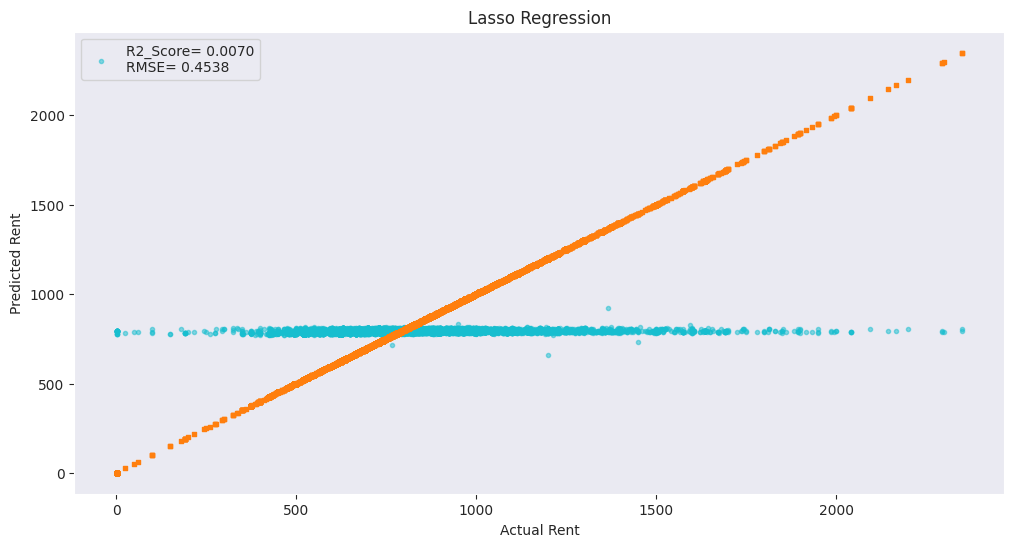

In [106]:
from sklearn.linear_model import Lasso

# Create and train the Lasso regression model
lasso = Lasso(alpha=0.1)  # You can adjust the regularization strength by changing alpha
lasso.fit(X_train, y_train)

# Make predictions
lasso_pred = lasso.predict(X_test)

# Print performance metrics
print('Lasso Regression Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
print('R2_Score:', metrics.r2_score(y_test, lasso_pred))

# Visualize predictions
lasso_results = pd.DataFrame(data={'Predicted_Rent': np.exp(lasso_pred), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(lasso_results['Actual_Rent'], lasso_results['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(lasso_results['Actual_Rent'], lasso_results['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, lasso_pred),
                np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
           ],
           loc='best')
plt.title('Lasso Regression')
plt.grid()
plt.show()


**Ridge Regression**

Ridge Regression Performance:
MAE: 0.1773069641894241
RMSE: 0.4153235077735993
R2_Score: 0.16804671509993785


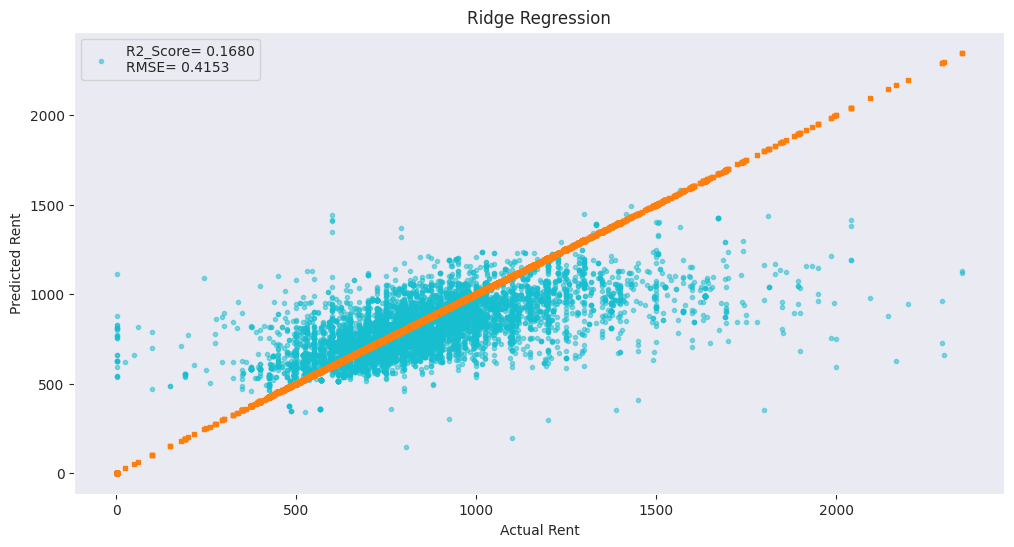

In [107]:
from sklearn.linear_model import Ridge

# Create and train the Ridge regression model
ridge = Ridge(alpha=0.1)  # You can adjust the regularization strength by changing alpha
ridge.fit(X_train, y_train)

# Make predictions
ridge_pred = ridge.predict(X_test)

# Print performance metrics
print('Ridge Regression Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print('R2_Score:', metrics.r2_score(y_test, ridge_pred))

# Visualize predictions
ridge_results = pd.DataFrame(data={'Predicted_Rent': np.exp(ridge_pred), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(ridge_results['Actual_Rent'], ridge_results['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(ridge_results['Actual_Rent'], ridge_results['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, ridge_pred),
                np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
           ],
           loc='best')
plt.title('Ridge Regression')
plt.grid()
plt.show()


**Elastic Net**

Elastic Net Regression Performance:
MAE: 0.21589170321272255
RMSE: 0.445007999483756
R2_Score: 0.04487205882300538


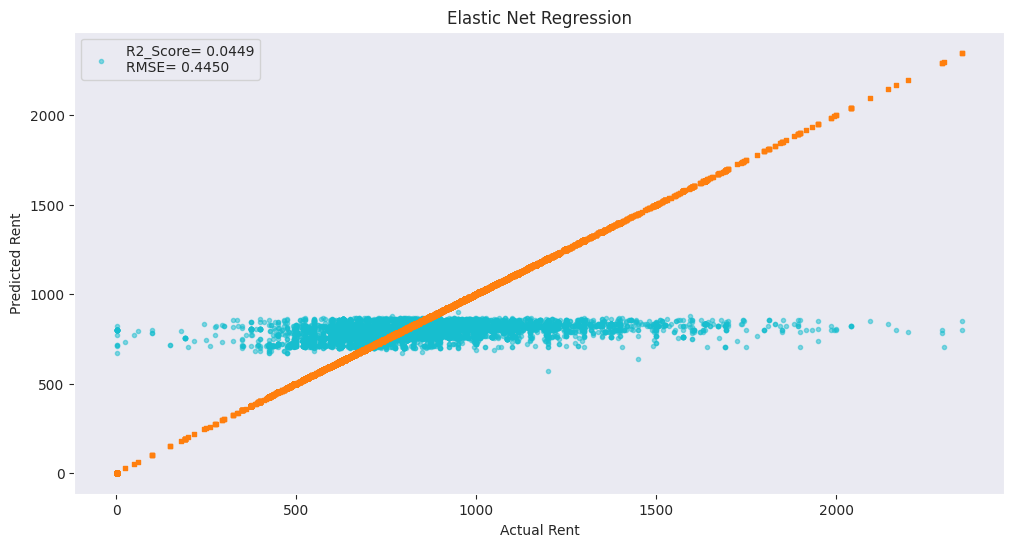

In [108]:
from sklearn.linear_model import ElasticNet

# Create and train the Elastic Net regression model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # You can adjust alpha and l1_ratio as per your requirements
elastic_net.fit(X_train, y_train)

# Make predictions
elastic_net_pred = elastic_net.predict(X_test)

# Print performance metrics
print('Elastic Net Regression Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, elastic_net_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_net_pred)))
print('R2_Score:', metrics.r2_score(y_test, elastic_net_pred))

# Visualize predictions
elastic_net_results = pd.DataFrame(data={'Predicted_Rent': np.exp(elastic_net_pred), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(elastic_net_results['Actual_Rent'], elastic_net_results['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(elastic_net_results['Actual_Rent'], elastic_net_results['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, elastic_net_pred),
                np.sqrt(metrics.mean_squared_error(y_test, elastic_net_pred)))
           ],
           loc='best')
plt.title('Elastic Net Regression')
plt.grid()
plt.show()


### **Random Forest**
Let's try random forest with our data splits (with and without feature selection). Scaling the features should not affect this algorithm's performance, still we are going to test it.

**Model Training**

In [110]:
rf1 = RandomForestRegressor(random_state=101, n_estimators=200)
rf2 = RandomForestRegressor(random_state=101, n_estimators=200)

rf1.fit(X_train, y_train)
rf2.fit(X2_train, y2_train)

RandomForestRegressor(n_estimators=200, random_state=101)

**Predictions**

In [111]:
rf1_pred = rf1.predict(X_test)
rf2_pred = rf2.predict(X2_test)

**Evaluation**

Random Forest Performance:

all features, No scaling:
MAE: 0.05934575293520663
RMSE: 0.18766878272210105
R2_Score:  0.8301326200583518


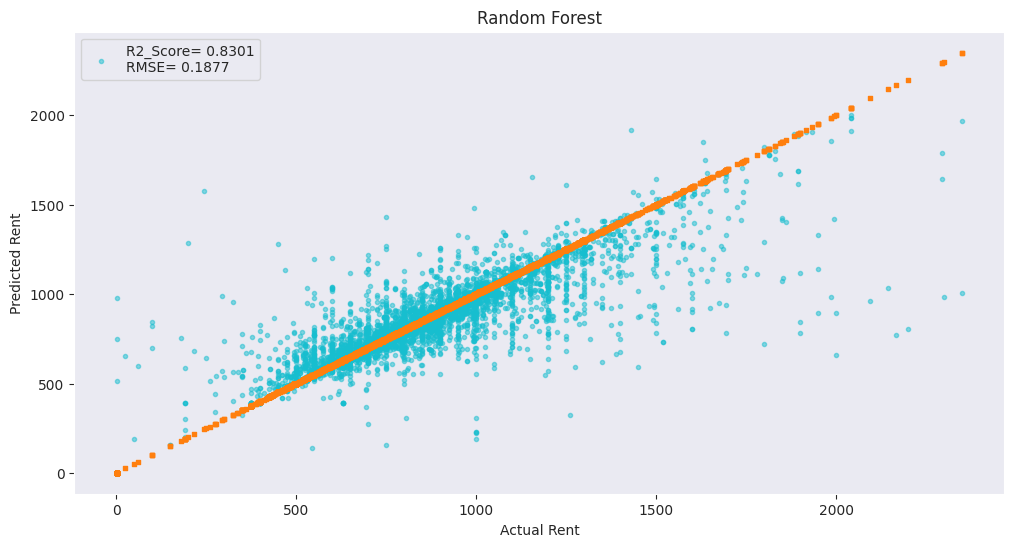

In [112]:
print('Random Forest Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))


pred = pd.DataFrame(data={'Predicted_Rent': np.exp(rf1_pred), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, rf1_pred),
                np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
           ],
           loc='best')
plt.title('Random Forest')
plt.grid()
plt.show()

Features without scaling gave a better result on random forest than with scaled features

**Artificial Neural Network**

In [113]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create the ANN model
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Add additional hidden layers
model.add(Dense(units=64, activation='relu'))

# Add the output layer
model.add(Dense(units=1))  # Assuming 1 output neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error loss for regression

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
ann_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, ann_pred)
rmse = mean_squared_error(y_test, ann_pred, squared=False)  # RMSE is the square root of MSE
r2 = r2_score(y_test, ann_pred)

# Print evaluation metrics
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2) Score:', r2)


Epoch 1/100
564/564 [==============================] - 3s 4ms/step - loss: 0.8218 - val_loss: 0.2322
Epoch 2/100
564/564 [==============================] - 2s 3ms/step - loss: 0.2448 - val_loss: 0.1965
Epoch 3/100
564/564 [==============================] - 3s 5ms/step - loss: 0.2556 - val_loss: 0.1941
Epoch 4/100
564/564 [==============================] - 2s 3ms/step - loss: 0.2531 - val_loss: 0.2242
Epoch 5/100
564/564 [==============================] - 2s 3ms/step - loss: 0.2494 - val_loss: 0.2227
Epoch 6/100
564/564 [==============================] - 2s 3ms/step - loss: 0.2500 - val_loss: 0.1846
Epoch 7/100
564/564 [==============================] - 2s 3ms/step - loss: 0.2477 - val_loss: 0.3825
Epoch 8/100
564/564 [==============================] - 2s 3ms/step - loss: 0.2546 - val_loss: 0.1942
Epoch 9/100
564/564 [==============================] - 2s 4ms/step - loss: 0.2481 - val_loss: 0.2312
Epoch 10/100
564/564 [==============================] - 2s 4ms/step - loss: 0.2395 - val_lo

### **Model Deployment**

**Pickle file**

In [114]:
import pickle

# Create and train the Random Forest regression model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
random_forest.fit(X_train, y_train)

# Save the model to a file using pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(random_forest, f)


**Testing on Unknown Data**

             id                                                url  region  \
453  7040949160  https://bham.craigslist.org/apa/d/birmingham-o...       0   

                      region_url     price  type    sqfeet  beds  baths  \
453  https://bham.craigslist.org  6.966967     0  7.003974     2    2.0   

     cats_allowed  dogs_allowed  smoking_allowed  wheelchair_access  \
453             1             1                1                  0   

     electric_vehicle_charge  comes_furnished  laundry_options  \
453                        0                0                0   

     parking_options                                          image_url  \
453                0  https://images.craigslist.org/00808_kOYTlsX1LU...   

                                           description      lat     long  \
453  Find Your Way to Haven Apartment Homes Come ho...  33.3755 -86.8045   

     state  premium_house  pets_allowed  beds_per_sqfeet  baths_per_beds  \
453      0              1           

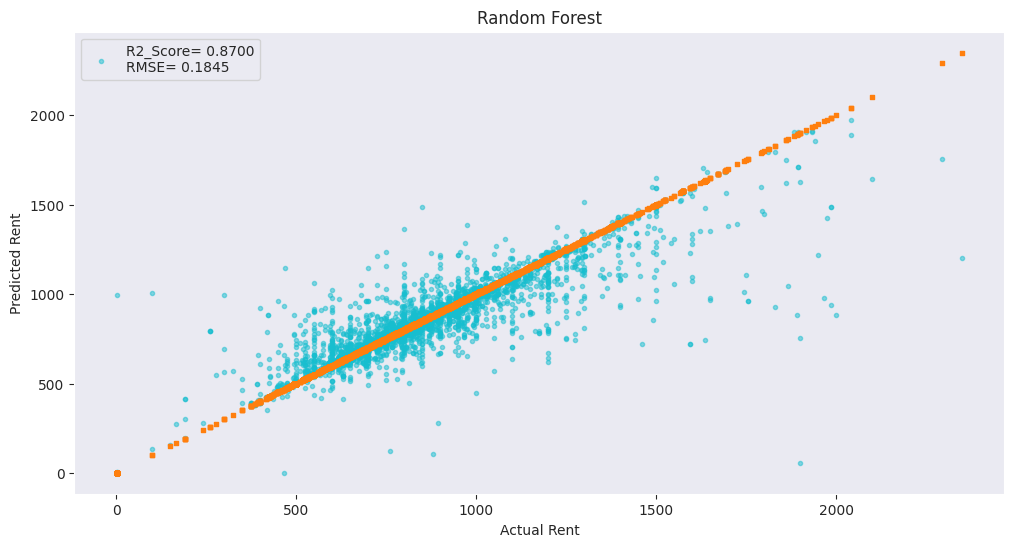

In [121]:
import pandas as pd
import numpy as np

def data_preprocessing(data):
    # Handle missing values in categorical variables
    cat_var_na = ['laundry_options', 'parking_options']
    def impute_missing_cat(data, var, modeof):
        return data.groupby(modeof)[var].transform(
            lambda x: x.fillna(x.mode()[0]))
    data["laundry_options"] = impute_missing_cat(data, "laundry_options", "type")
    data["parking_options"] = impute_missing_cat(data, "parking_options", "type")
    data = data.dropna(subset=["state", "description"], axis=0)

    # Handle missing values in numerical variables
    num_var_na = ['lat', 'long']
    def impute_missing_num(data, var, meanof):
        return data.groupby(meanof)[var].transform(
            lambda x: x.fillna(x.mode()[0]))
    data["lat"] = impute_missing_num(data, "lat", "region")
    data["long"] = impute_missing_num(data, "long", "region")

    # Filter data based on specified upper and lower bounds
    price_upper, price_lower = 2400, 1
    sqfeet_upper, sqfeet_lower = 1762, 1
    beds_upper, beds_lower = 3, 1
    baths_upper, baths_lower = 3, 1

    data = data[(data['price'] <= price_upper) & (data['price'] >= price_lower)]
    data = data[(data['sqfeet'] <= sqfeet_upper) & (data['sqfeet'] >= sqfeet_lower)]
    data = data[(data['beds'] <= beds_upper) & (data['beds'] >= beds_lower)]
    data = data[(data['baths'] <= baths_upper) & (data['baths'] >= baths_lower)]

    # Engineer new features
    data['premium_house'] = np.where((data['baths'] >= data['beds']) & (data['beds'] > 1), 1, 0)
    data['pets_allowed'] = np.where((data['cats_allowed'] == 1) & (data['dogs_allowed'] == 1), 1, 0)
    data['beds_per_sqfeet'] = data['beds'] / data['sqfeet']
    data['baths_per_beds'] = data['baths'] / data['beds']

    # Extract features from description column
    data['has_pool'] = data['description'].str.lower().str.contains('pool|swimming').astype(int)
    data['has_grill'] = data['description'].str.lower().str.contains('grill|grilling').astype(int)
    # Add other feature extraction steps here...

    # Log transformation of selected numerical features
    for var in ['price', 'sqfeet', 'baths_per_beds', 'beds_per_sqfeet']:
        data[var] = np.log1p(data[var])  # Use np.log1p to avoid errors with zero or negative values

    # Replace categorical variables with ordered labels based on target mean
    cat_vars = ['region', 'type', 'laundry_options', 'parking_options', 'state']
    frequent_ls = { 'region': ['denver', 'fayetteville', 'jacksonville', 'omaha / council bluffs', 'rochester'], 'type': ['apartment', 'condo', 'duplex', 'house', 'manufactured', 'townhouse'], 'laundry_options': ['laundry in bldg', 'laundry on site', 'w/d hookups', 'w/d in unit'], 'parking_options': ['attached garage', 'carport', 'detached garage', 'off-street parking', 'street parking'], 'state': ['al', 'ar', 'az', 'ca', 'co', 'ct', 'fl', 'ga', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'mi', 'mn', 'ms', 'nc', 'nd', 'ne', 'nj', 'nm', 'nv', 'ny', 'oh'] }
    for var in cat_vars:
        data[var] = np.where(data[var].isin(frequent_ls[var]), data[var], 'Rare')

    # Replace categorical strings with integers
    def replace_categories(data, var, target):
        ordered_labels = data.groupby([var])[target].mean().sort_values().index
        ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
        data[var] = data[var].map(ordinal_label)

    for var in cat_vars:
        replace_categories(data, var, 'price')

    # Check for null values
    null_vars = [var for var in data.columns if data[var].isnull().sum() > 0]
    if len(null_vars) > 0:
        print("Warning: Null values still present after preprocessing.")



    return data

# Load the test dataset
AML_testDS = pd.read_csv('AML_testDS.csv')

# Select a random row
random_row = AML_testDS.sample(n=1, random_state=42)

# Apply the preprocessing function
processed_data = data_preprocessing(random_row)
print(processed_data)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf1 = RandomForestRegressor(random_state=101, n_estimators=200)
rf2 = RandomForestRegressor(random_state=101, n_estimators=200)

rf1.fit(X_train, y_train)
rf2.fit(X2_train, y2_train)
rf1_pred = rf1.predict(X_test)
rf2_pred = rf2.predict(X2_test)

# Model evaluation
print('Random Forest Performance:')
print('\nAll features, No scaling:')
print('MAE:', mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', r2_score(y_test, rf1_pred))

# Visualization
pred = pd.DataFrame(data={'Predicted_Rent': np.exp(rf1_pred), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                r2_score(y_test, rf1_pred),
                np.sqrt(mean_squared_error(y_test, rf1_pred)))
           ],
           loc='best')
plt.title('Random Forest')
plt.grid()
plt.show()


**Downloading the Trained Random Forest Model**

In [122]:
from google.colab import files

# Specify the file path
file_path = '/content/random_forest_model.pkl'

# Download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>